# Homicide data analysis

## Data Cleaning

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
# Loading the data
df=pd.read_csv('homicide-data.csv',encoding='latin-1')

In [72]:
df.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            52179 non-null  object 
 1   reported_date  52179 non-null  int64  
 2   victim_last    52178 non-null  object 
 3   victim_first   52179 non-null  object 
 4   victim_race    52179 non-null  object 
 5   victim_age     52179 non-null  object 
 6   victim_sex     52179 non-null  object 
 7   city           52179 non-null  object 
 8   state          52179 non-null  object 
 9   lat            52119 non-null  float64
 10  lon            52119 non-null  float64
 11  disposition    52179 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


# Fixing The Columns and data types and Treating the missing values

In [74]:
# Dropping the unwanted features/columns
df.drop('victim_last',axis=1,inplace=True)
df.drop('victim_first',axis=1,inplace=True)
df.drop('lat',axis=1,inplace=True)
df.drop('lon',axis=1,inplace=True)

In [75]:
# checking the columns after droping 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uid            52179 non-null  object
 1   reported_date  52179 non-null  int64 
 2   victim_race    52179 non-null  object
 3   victim_age     52179 non-null  object
 4   victim_sex     52179 non-null  object
 5   city           52179 non-null  object
 6   state          52179 non-null  object
 7   disposition    52179 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


In [76]:
# Changing the dtype of the reported_Date column to date type and format
df['reported_date']= pd.to_datetime(df['reported_date'].astype(str),format='%Y%m%d',errors='coerce')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            52179 non-null  object        
 1   reported_date  52177 non-null  datetime64[ns]
 2   victim_race    52179 non-null  object        
 3   victim_age     52179 non-null  object        
 4   victim_sex     52179 non-null  object        
 5   city           52179 non-null  object        
 6   state          52179 non-null  object        
 7   disposition    52179 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 3.2+ MB


In [78]:
df=df[df['victim_age'].str.isnumeric()]

In [79]:
# converting the dtype object to int
df['victim_age']=df['victim_age'].astype(int)

In [80]:
# Now You can see age column dtype is changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49180 entries, 0 to 52178
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            49180 non-null  object        
 1   reported_date  49180 non-null  datetime64[ns]
 2   victim_race    49180 non-null  object        
 3   victim_age     49180 non-null  int32         
 4   victim_sex     49180 non-null  object        
 5   city           49180 non-null  object        
 6   state          49180 non-null  object        
 7   disposition    49180 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 3.2+ MB


In [81]:
# checking duplicate values
df.duplicated().sum()

0

In [82]:
df.shape

(49180, 8)

In [83]:
# Checking Null Values
df.isnull().sum()

uid              0
reported_date    0
victim_race      0
victim_age       0
victim_sex       0
city             0
state            0
disposition      0
dtype: int64

In [84]:
df.describe()

,victim_age
count,49180.000000
mean,31.801220
std,14.418692
min,0.000000
25%,22.000000
50%,28.000000
75%,40.000000
max,102.000000


- Since we have only one discrete column we need to find outlier in that(age)column

<Axes: xlabel='victim_age'>

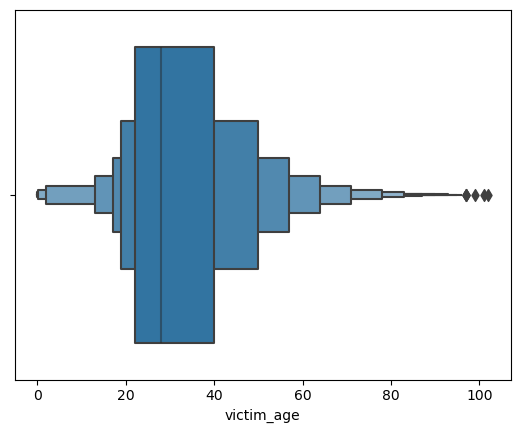

In [85]:
sns.boxenplot(x='victim_age',data=df)

- I Think There is no out liers becuase the age of human is would be between 0 to 100. and the data values are also lies between the same values so there is no outlires

In [86]:
# Handling Missing Values
df.isnull().sum()

uid              0
reported_date    0
victim_race      0
victim_age       0
victim_sex       0
city             0
state            0
disposition      0
dtype: int64

# EDA 

## Statistic Summary

In [87]:
df.describe()

,victim_age
count,49180.000000
mean,31.801220
std,14.418692
min,0.000000
25%,22.000000
50%,28.000000
75%,40.000000
max,102.000000


- I want see the distribution of the ages. so i put the above statistical data into new Df. now i need to delete the count column because it will effect the distibution graph as it has count of 49180 which is huge and unreal,unrelated.

Text(0.5, 1.0, 'Age Distribution Plot')

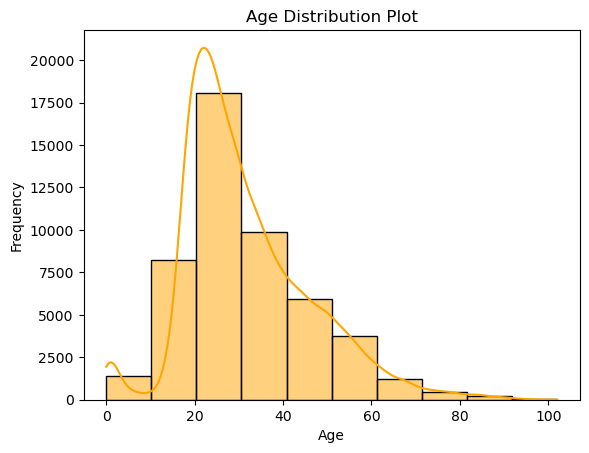

In [88]:
sns.histplot(df['victim_age'],kde=True,color = 'orange',bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Plot')

## Observation
- The Age Distribution is Not in Normal Distribution .. It is a Right Skewed Distribution
- The most of the people are having age 0 to 40(75%percentaile) murderd by criminals

# Exploring The Categorical Columns And Visulation

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49180 entries, 0 to 52178
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            49180 non-null  object        
 1   reported_date  49180 non-null  datetime64[ns]
 2   victim_race    49180 non-null  object        
 3   victim_age     49180 non-null  int32         
 4   victim_sex     49180 non-null  object        
 5   city           49180 non-null  object        
 6   state          49180 non-null  object        
 7   disposition    49180 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 3.2+ MB


### Reported_Date

In [90]:
df['reported_date'].value_counts()

2017-10-01    69
2017-07-05    36
2015-12-02    33
2015-05-25    31
2016-08-13    31
              ..
2008-08-04     2
2010-02-24     2
2017-12-08     2
2012-02-20     2
2007-09-06     1
Name: reported_date, Length: 4018, dtype: int64

In [91]:
# adding a new column 'year' to group the year and find how many cases have filed in each year
df['year']=df['reported_date'].dt.year

In [92]:
df.head()

,uid,reported_date,victim_race,victim_age,victim_sex,city,state,disposition,year
0,Alb-000001,2010-05-04,Hispanic,78,Male,Albuquerque,NM,Closed without arrest,2010
1,Alb-000002,2010-02-16,Hispanic,17,Male,Albuquerque,NM,Closed by arrest,2010
2,Alb-000003,2010-06-01,White,15,Female,Albuquerque,NM,Closed without arrest,2010
3,Alb-000004,2010-01-01,Hispanic,32,Male,Albuquerque,NM,Closed by arrest,2010
4,Alb-000005,2010-01-02,White,72,Female,Albuquerque,NM,Closed without arrest,2010


In [93]:
df['year'].value_counts().reset_index()

,index,year
0,2016,5928
1,2015,5046
2,2017,4781
3,2012,4596
4,2010,4416
5,2014,4339
6,2013,4312
7,2011,4261
8,2007,3984
9,2008,3979


In [94]:
# Putting the above data into new data frame
df_year_wise_cases = df['year'].value_counts().reset_index()
df_year_wise_cases.columns=['Year', 'Count of Cases']

In [95]:
df_year_wise_cases

,Year,Count of Cases
0,2016,5928
1,2015,5046
2,2017,4781
3,2012,4596
4,2010,4416
5,2014,4339
6,2013,4312
7,2011,4261
8,2007,3984
9,2008,3979


Text(0.5, 1.0, 'Year wise Homicide Reports')

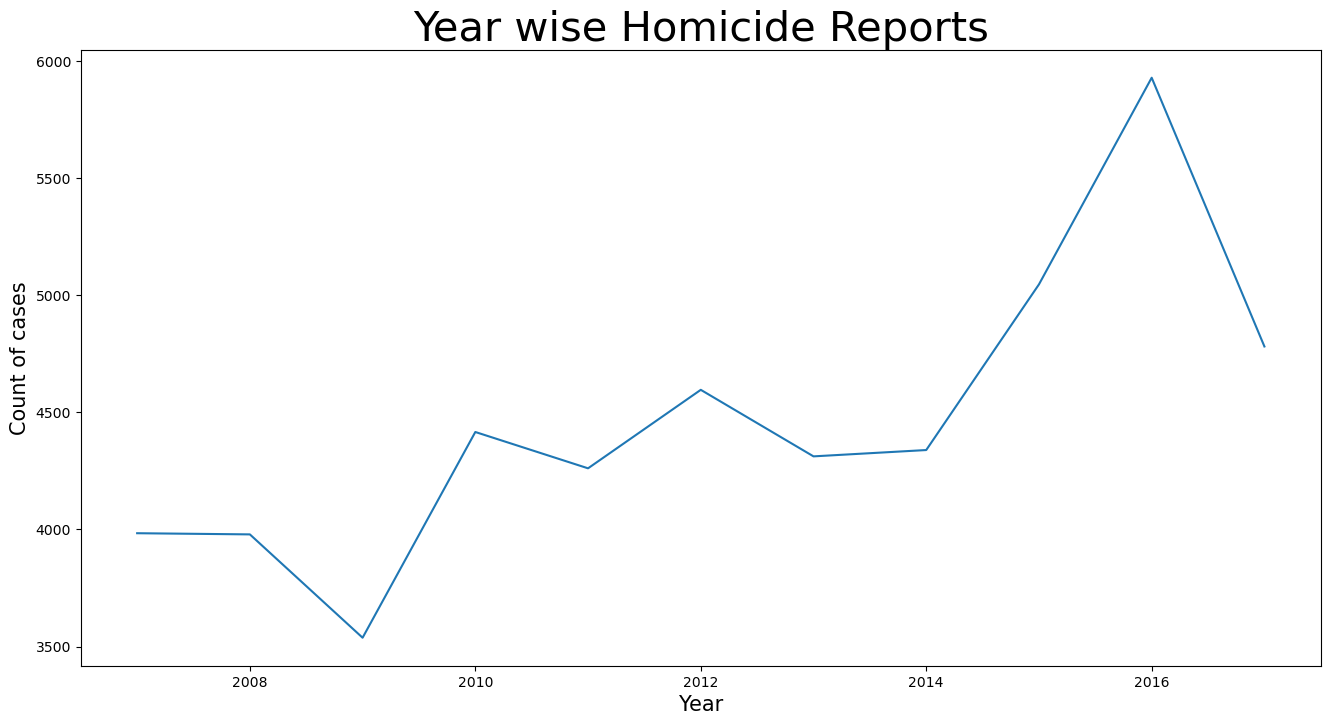

In [96]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y ='Count of Cases',data=df_year_wise_cases)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count of cases',fontsize=15)
plt.title("Year wise Homicide Reports",fontsize=30)


## Observation:
- In The Year **2016** Highest Homicide Report have been filed
- In The Year **2015** Second Highest Homicide Report has been filed
- From **2013** to **2016** the Murders happen in consistent and in growth manner
- Lowest: - In The Year **2009** Lowest Homicide Report have been filed

## Victim_Race

In [97]:
df_Race= df.groupby('victim_race').size().reset_index()
df_Race.columns= ['Victim Race', 'Count of Records']

In [98]:
df_Race

,Victim Race,Count of Records
0,Asian,679
1,Black,33130
2,Hispanic,6835
3,Other,671
4,Unknown,1591
5,White,6274


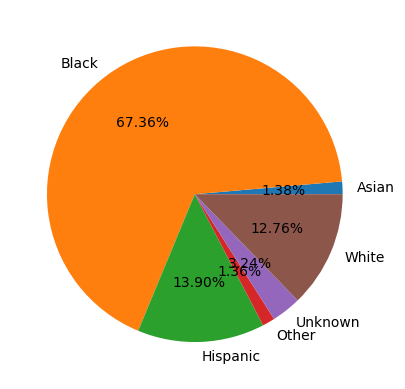

In [99]:
plt.pie(x='Count of Records',labels='Victim Race',data=df_Race,autopct='%1.2f%%')
plt.show()

## Observation 
- The Race Blak is having Highest Homicide cases **67.36%** 
- and The Other and Asian Race  is having Lowest Homicide cases **1.36% and 1.38%** 

## victim_age

- We Need To Find The Victims age wise.. as i have 101 unique records in age columns its bit trickkey to understand the distribution so i segregate the ages into age_category according to the ages. after that i used bar graph to see the distribution

In [100]:
df_age=df.groupby('victim_age').size().reset_index()
df_age.columns=['Age','Count of People']

In [101]:
df_age

,Age,Count of People
0,0,385
1,1,344
2,2,188
3,3,128
4,4,83
...,...,...
96,96,2
97,97,3
98,99,1
99,101,1


<Axes: xlabel='Age', ylabel='Count of People'>

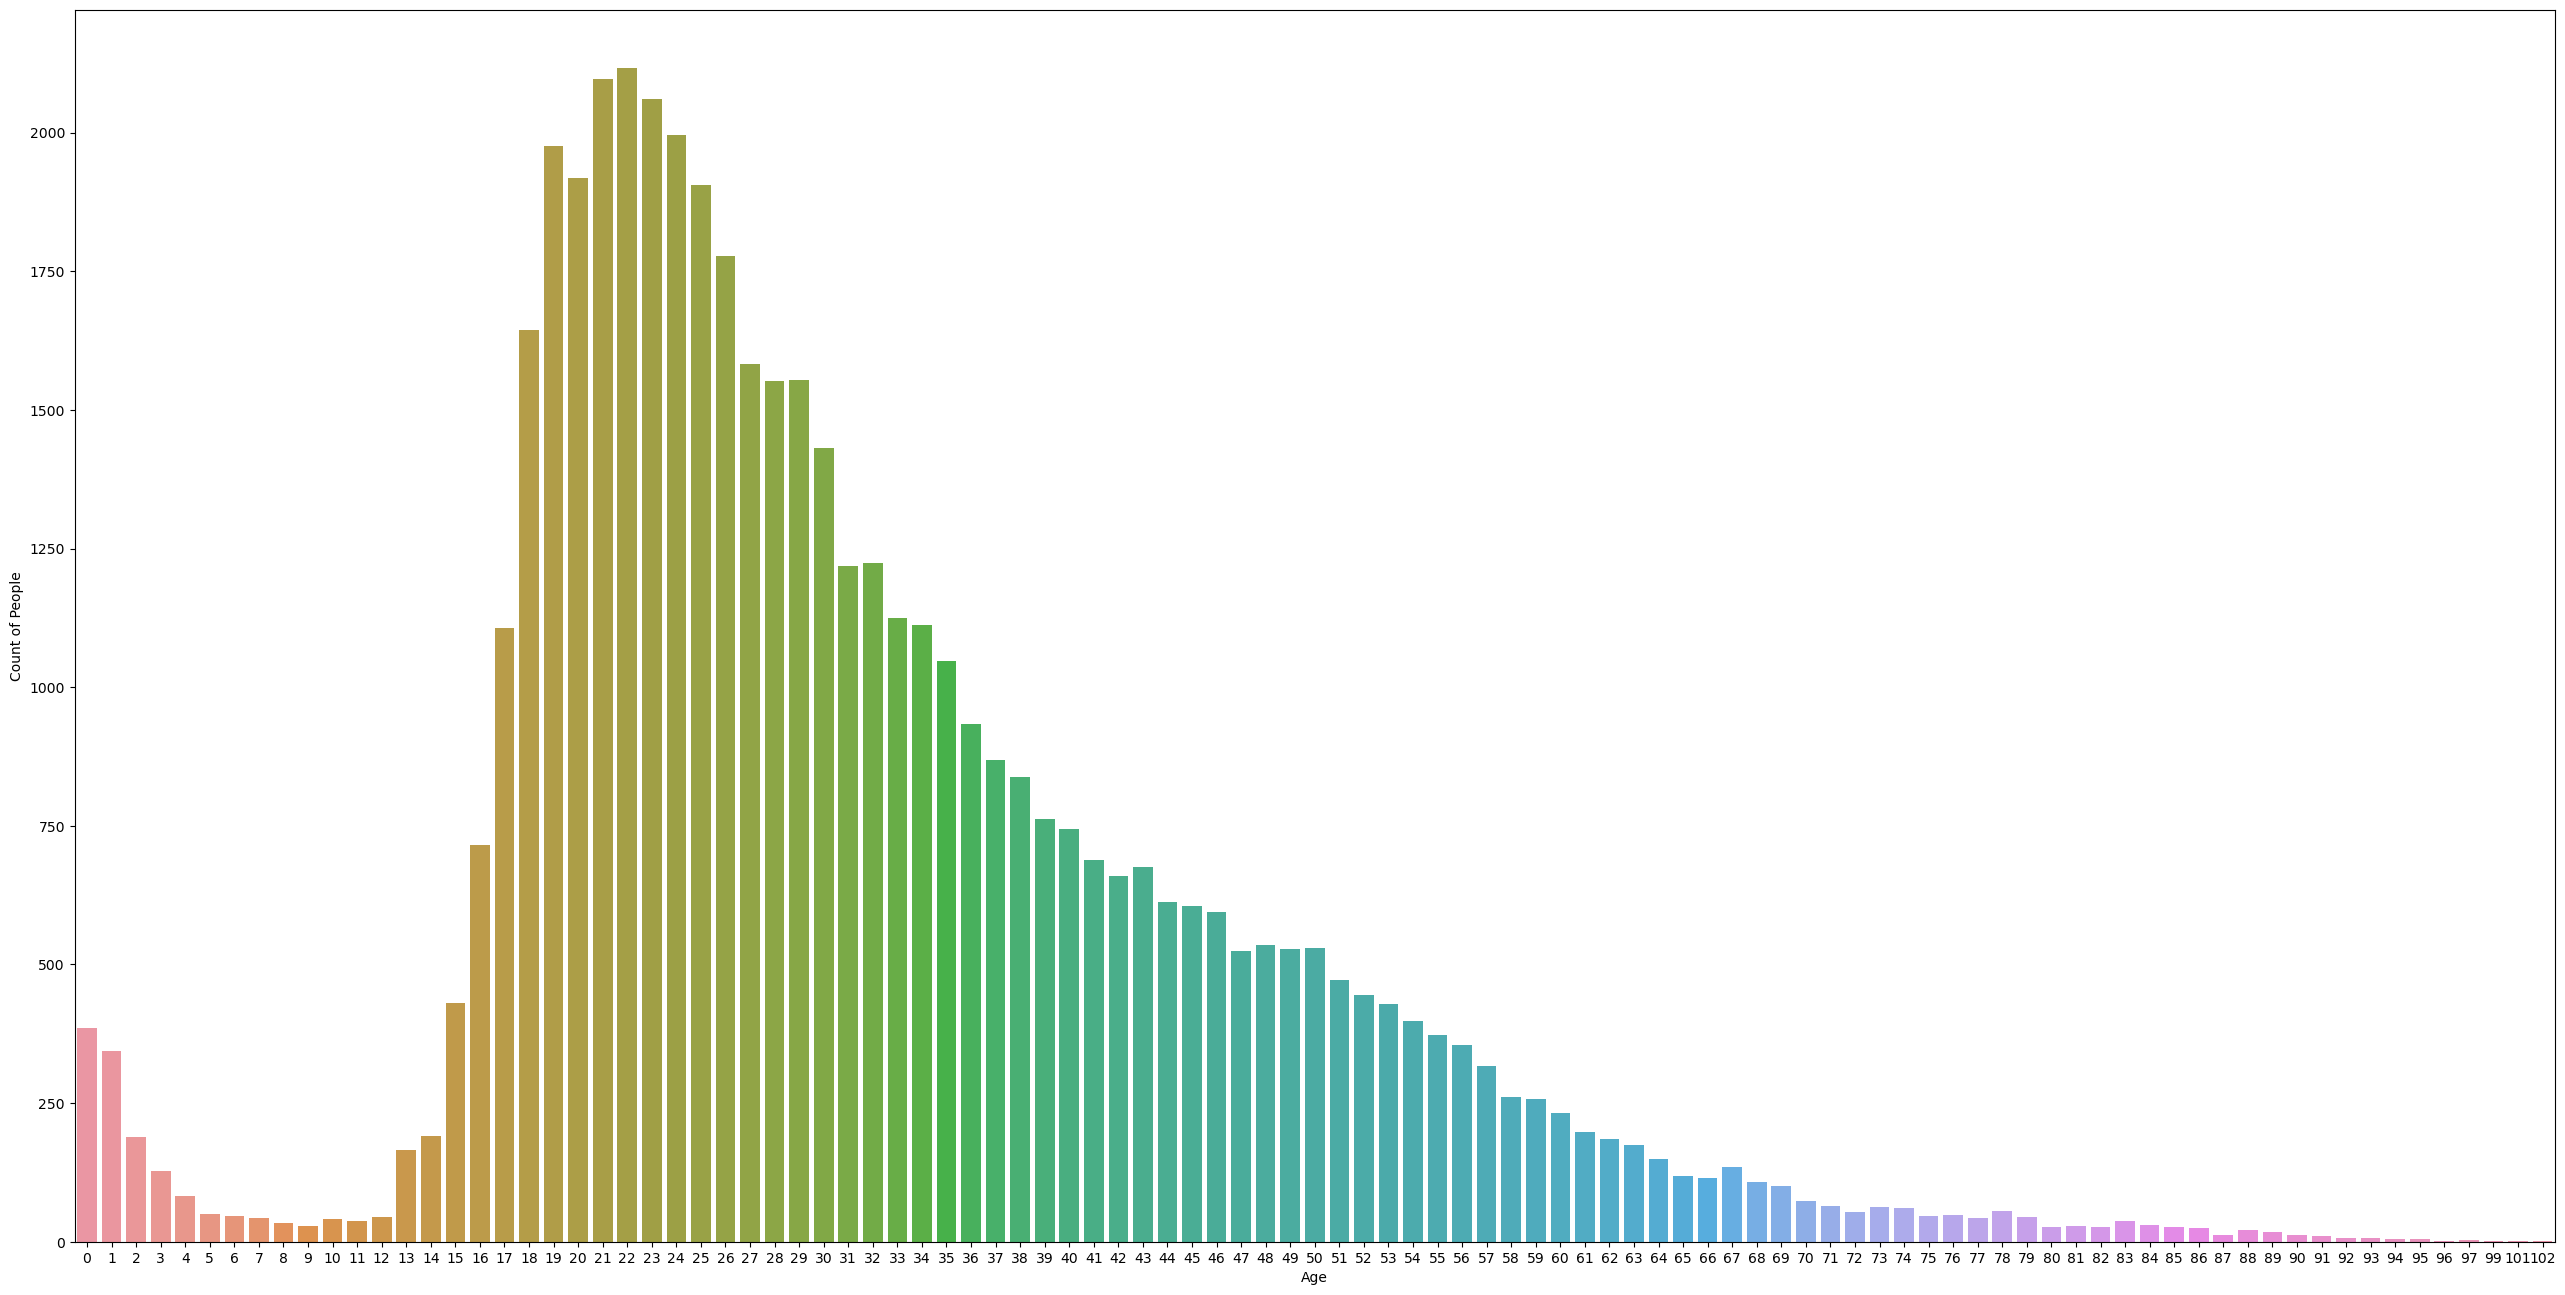

In [102]:
# graph with age values only
plt.figure(figsize=(32,16))
sns.barplot(x='Age',y='Count of People',data=df_age)

### Here am segregated the ages with the category's

In [103]:
df['victim_age'].unique()

array([ 78,  17,  15,  32,  72,  91,  52,  56,  43,  20,  46,  16,  54,
        22,  49,  25,  47,  88,  27,  36,   1,  58,  42,  50,   3,  21,
        19,  95,  24,  41,  51,  18,   8,  64,  30,   2,  39,  45,  31,
         0,  23,  28,  35,  26,  40,  94,  33,  57,  55,  29,  53,  66,
         5,  74,  69,  37,  59,  34,  38,  44,  14,   9,  65,  90,  48,
        62,  60,   4,  70,  10,  11,  63,   6,  73,  75,  68, 101,  13,
        77,  92,  71,  82,  61,  12,  84,  76,  67,  81,  89,  83,  85,
        80,  86,  79,  97,   7,  96,  87,  93,  99, 102])

In [104]:
age_bins = [0,12,19,30,41,60,81,103]
age_label = ['Child','Teeneger','Young','Adults','Middle Age', 'Senior Citizen', 'Super Senior Citizen']

In [105]:
df_age_group=pd.cut(df_age['Age'],bins=age_bins,labels=age_label,right=False).reset_index()

In [106]:
df_age['Age_Category']=df_age_group['Age']

In [107]:
df_age

,Age,Count of People,Age_Category
0,0,385,Child
1,1,344,Child
2,2,188,Child
3,3,128,Child
4,4,83,Child
...,...,...,...
96,96,2,Super Senior Citizen
97,97,3,Super Senior Citizen
98,99,1,Super Senior Citizen
99,101,1,Super Senior Citizen


Text(0.5, 1.0, 'Age Category wise Homicide Reports')

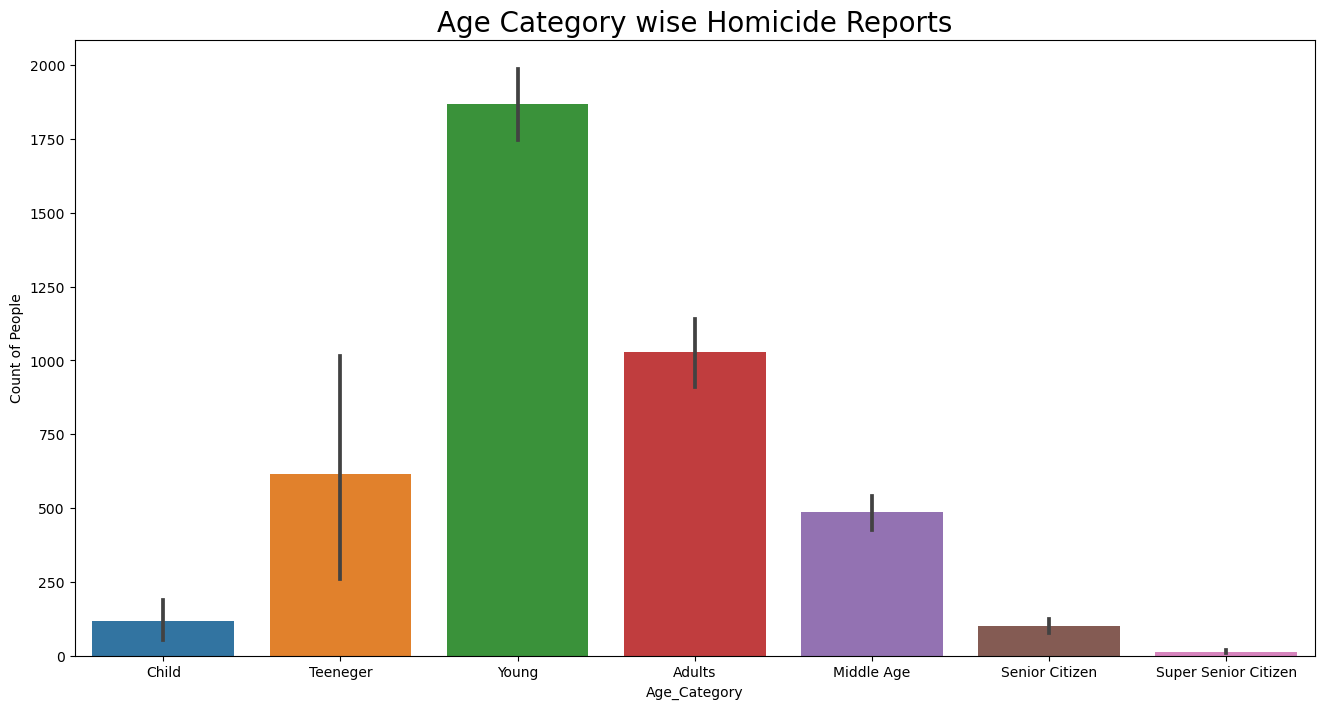

In [108]:
plt.figure(figsize=(16,8))
sns.barplot(x='Age_Category',y='Count of People',data=df_age)
plt.title('Age Category wise Homicide Reports',fontsize=20)

## Observations
- **Highest: The population of young people has the highest exposure to homicide.**
- **Second Highest: The population of adults ranks second in terms of exposure to homicide.**
- **Lowest: The population of senior citizens has the lowest exposure to homicide.**

## Victim Gender

In [126]:
df['victim_sex'].value_counts()

Male       40739
Female      7209
Unknown     4231
Name: victim_sex, dtype: int64

In [127]:
df_gender=df['victim_sex'].value_counts().reset_index()
df_gender.columns=['Gender','Count']

In [128]:
df_gender

,Gender,Count
0,Male,40739
1,Female,7209
2,Unknown,4231


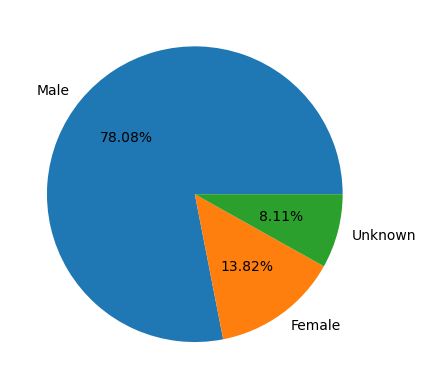

In [129]:
plt.pie(x='Count',labels='Gender',data=df_gender,autopct='%1.2f%%')
plt.show()

# Observation
- The Population Male People is highest than the Female People

# City

- **We have 48 cities, and to facilitate a more straightforward analysis of homicide reports, I have segmented them into two groups: the Top 10 cities and the Bottom 10 cities. This approach is intended to enhance understanding and streamline the analytical process.**

In [130]:
df['city'].value_counts()

Chicago           5535
Philadelphia      3037
Houston           2942
Baltimore         2827
Detroit           2519
Los Angeles       2257
St. Louis         1677
Dallas            1567
Memphis           1514
New Orleans       1434
Las Vegas         1381
Washington        1345
Indianapolis      1322
Kansas City       1190
Jacksonville      1168
Milwaukee         1115
Columbus          1084
Atlanta            973
Oakland            947
Phoenix            914
San Antonio        833
Birmingham         800
Nashville          767
Miami              744
Cincinnati         694
Charlotte          687
Oklahoma City      672
San Francisco      663
Pittsburgh         631
New York           627
Boston             614
Tulsa              584
Louisville         576
Fort Worth         549
Buffalo            521
Fresno             487
San Diego          461
Stockton           444
Richmond           429
Baton Rouge        424
Omaha              409
Albuquerque        378
Long Beach         378
Sacramento 

In [131]:
df_city=df['city'].value_counts().reset_index()
df_city.columns=['City', 'Count']

In [132]:
#Top 10 Cities
df_top_10_city=df_city.head(10)

In [133]:
df_top_10_city

,City,Count
0,Chicago,5535
1,Philadelphia,3037
2,Houston,2942
3,Baltimore,2827
4,Detroit,2519
5,Los Angeles,2257
6,St. Louis,1677
7,Dallas,1567
8,Memphis,1514
9,New Orleans,1434


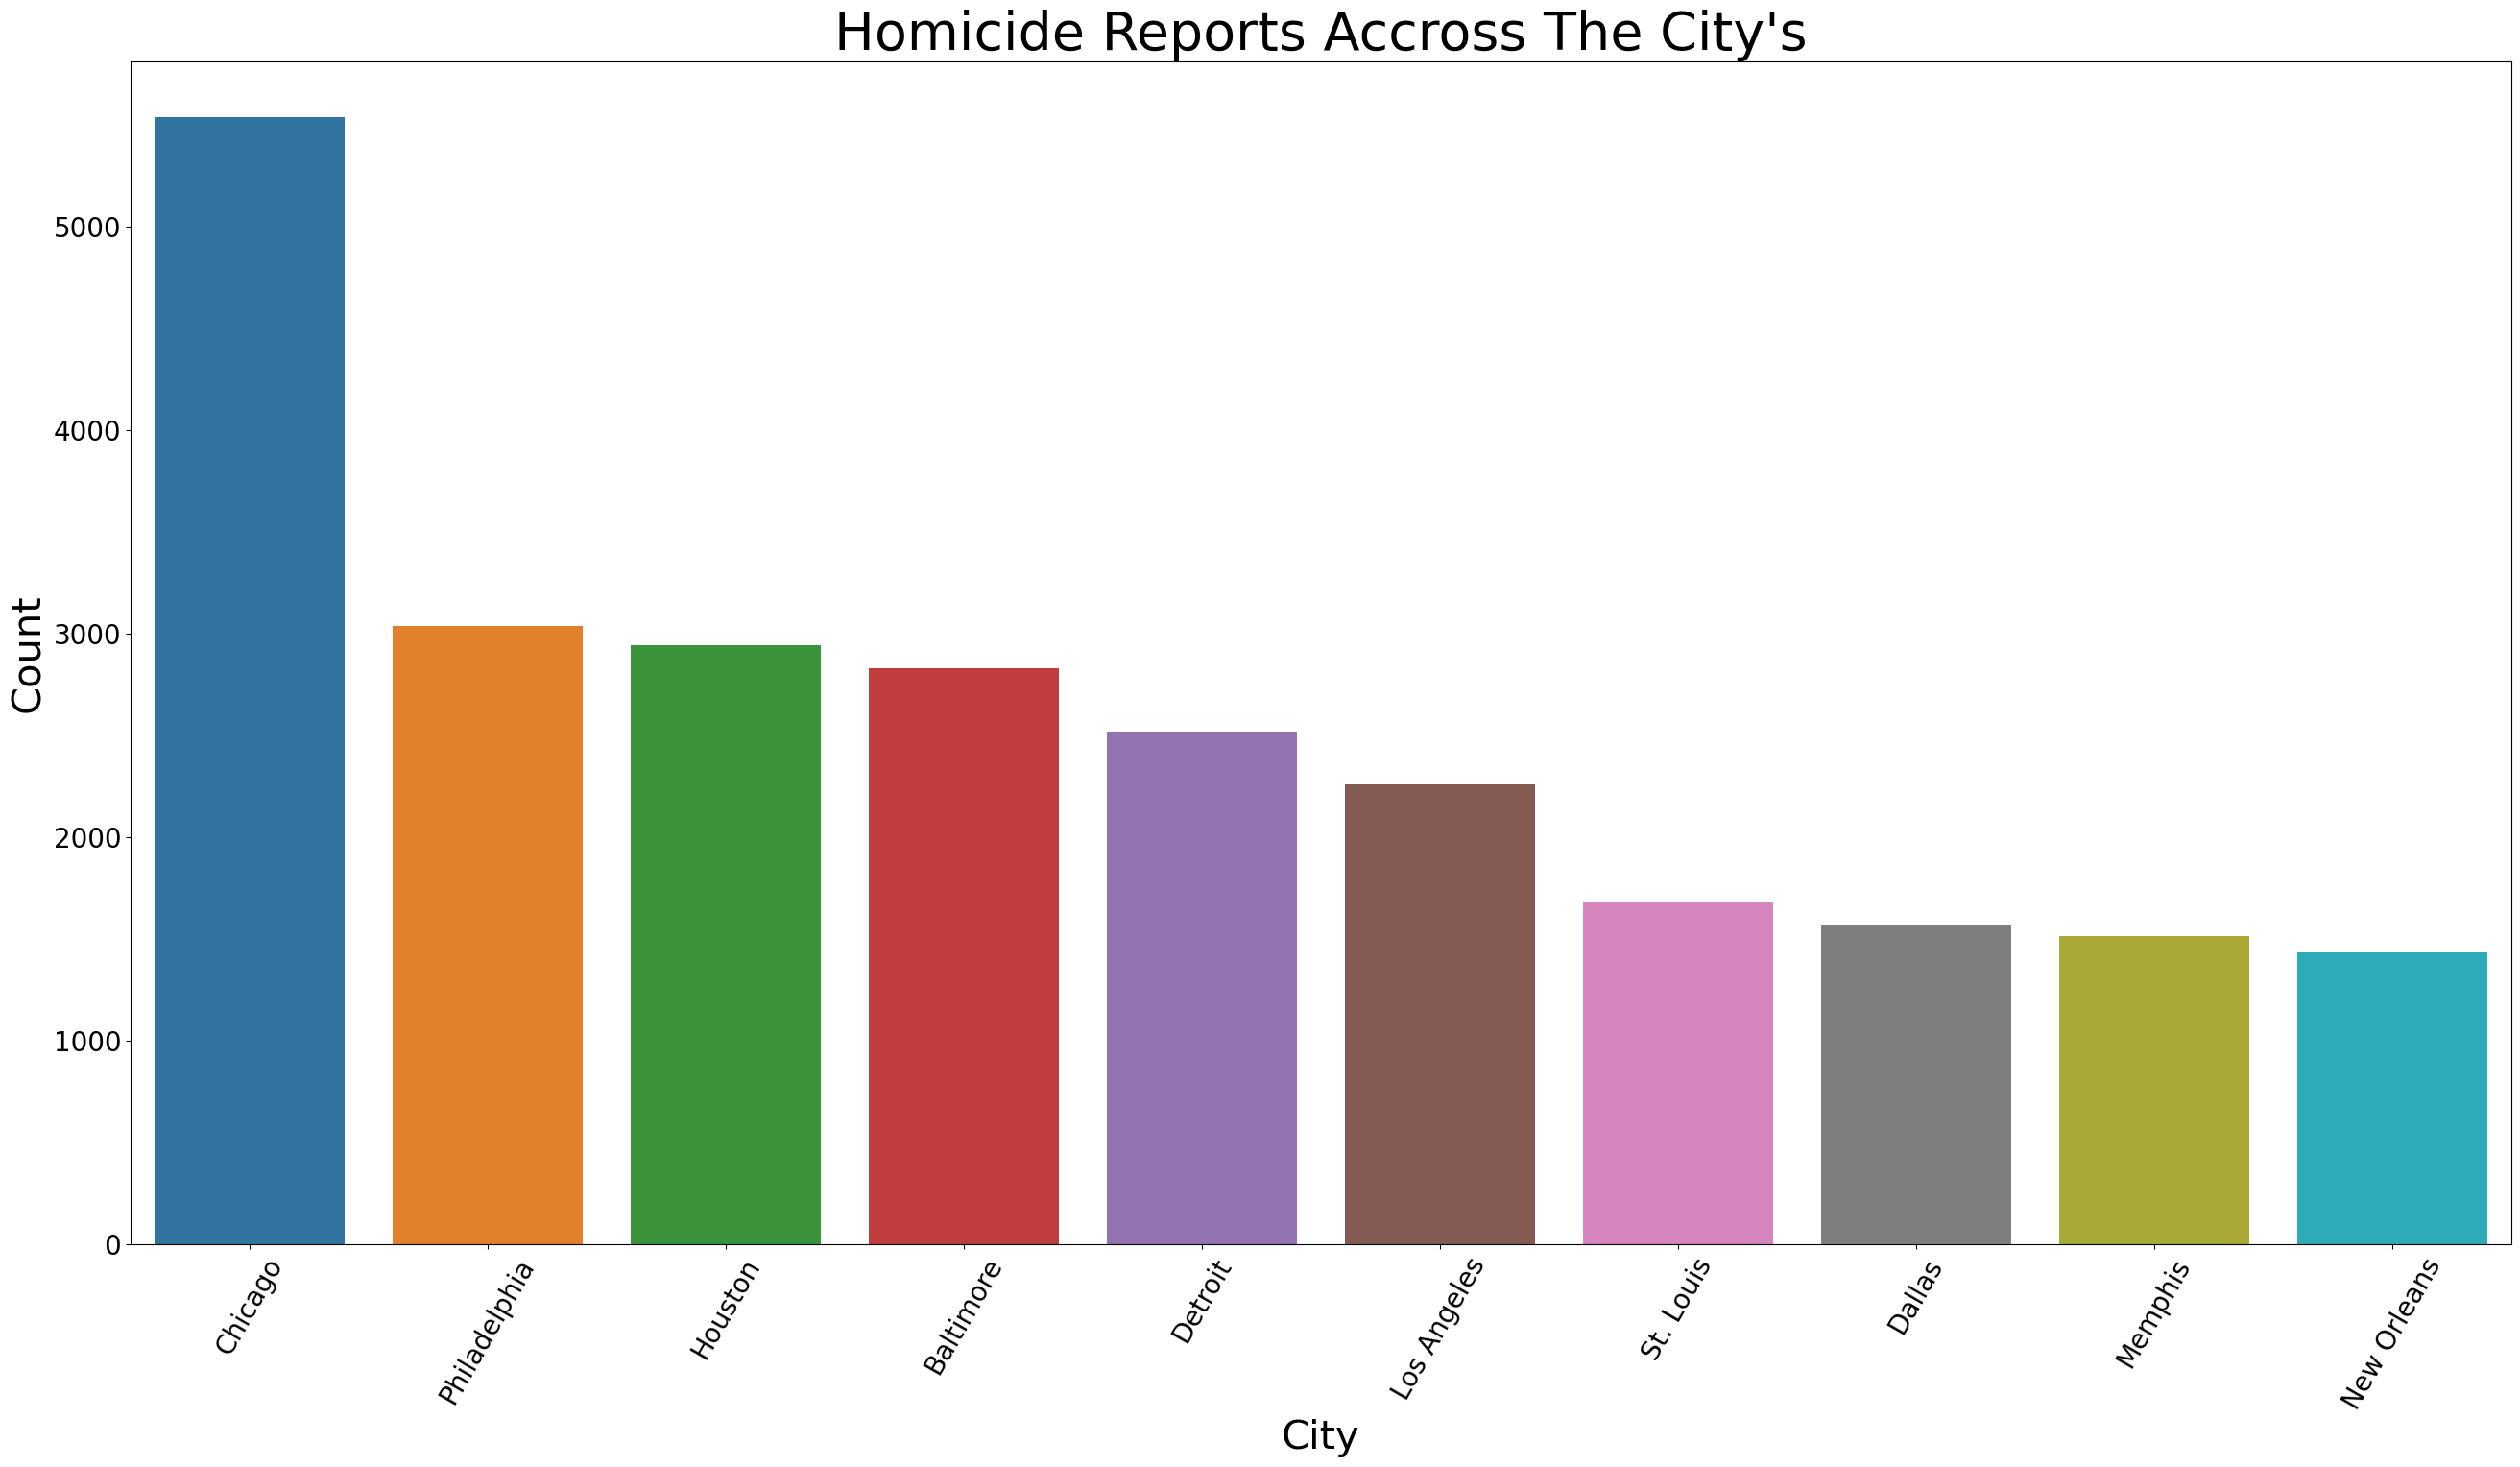

In [134]:
plt.figure(figsize=(32,16))
sns.barplot(x='City',y='Count',data=df_top_10_city)
plt.xticks(rotation=60)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.title("Homicide Reports Accross The City's",fontsize=40)
plt.show()


## Observation :
- **In The Top Ten Category, Chicago has most heighest Homicide Reports accross the Citys**

In [135]:
# Bottom 10 Citys
df_bottom_10_city= df_city.tail(10)

In [136]:
df_bottom_10_city

,City,Count
40,Omaha,409
41,Albuquerque,378
42,Long Beach,378
43,Sacramento,376
44,Minneapolis,366
45,Denver,312
46,Durham,276
47,San Bernardino,275
48,Savannah,246
49,Tampa,208


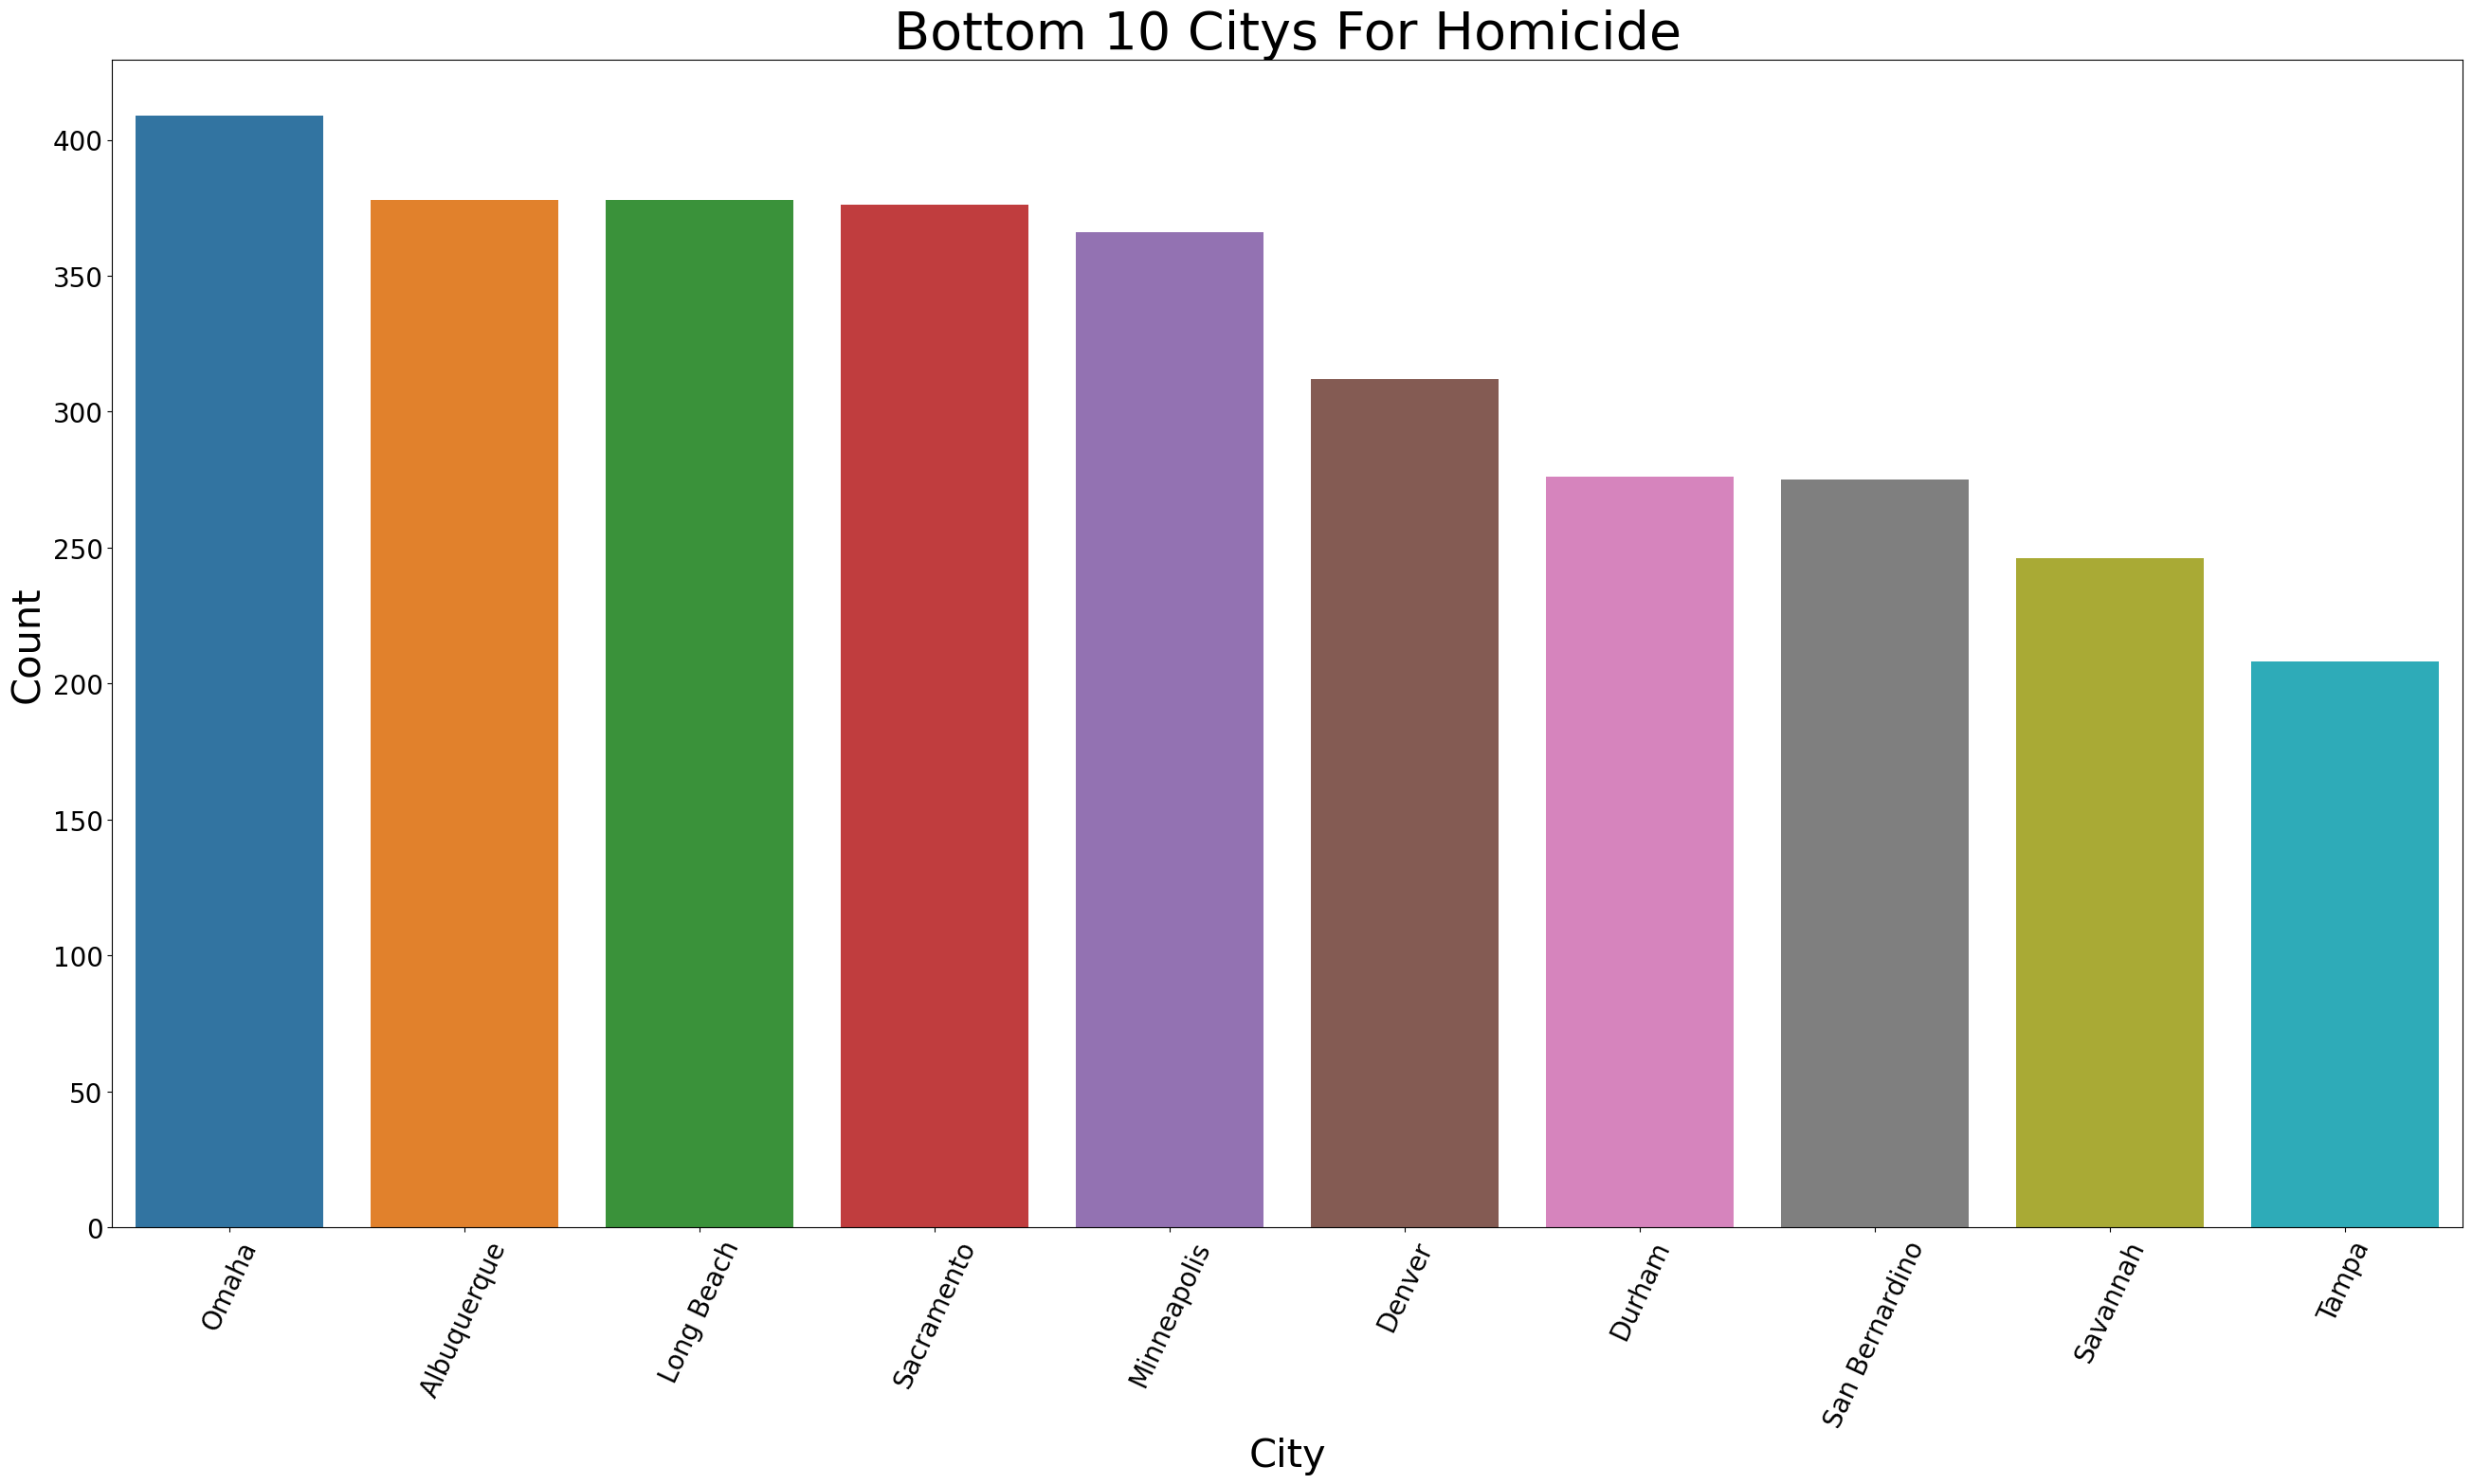

In [137]:
plt.figure(figsize=(32,16))
sns.barplot(x='City',y='Count',data=df_bottom_10_city)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=65)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Bottom 10 Citys For Homicide",fontsize=40)
plt.show()

## Observation :
- **In The Bottom Ten Category, Omaha has most heighest Homicide Reports accross the Citys and Tampa is in Last Plcae**

# State

In [138]:
df_state = df['state'].value_counts().reset_index()
df_state.columns=['State','Count']

In [139]:
df_state

,State,Count
0,CA,6288
1,TX,5891
2,IL,5535
3,PA,3668
4,MO,2867
5,MD,2827
6,MI,2519
7,TN,2281
8,FL,2120
9,LA,1858


In [140]:
state_mapping = {
'CA':'California',
'IL':'Illinois',
'TX':'Texas',
'PA':'Pennsylvania',
'MO':'Missouri',
'MD':'Maryland',
'MI':'Michigan',
'TN':'Tennessee',
'FL':'Florida',
'LA':'Louisiana',
'OH':'Ohio',
'NV':'Nevada',
'DC':'District of Columbia',
'IN':'Indiana',
'OK':'Oklahoma',
'GA':'Georgia',
'NY':'New York',
'wI':'Wisconsin',
'NC':'North Carolina',
'AL':'Alabama',
'MA':'Massachusetts',
'KY':'Kentucky',
'NE':'Nebraska',
'MN':'Minnesota',
'NM':'New Mexico',
'VA':'Virginia',
'CO':'Colorado'
}

In [141]:
df_state['State']=df_state['State'].replace(state_mapping)

In [142]:
df_state

,State,Count
0,California,6288
1,Texas,5891
2,Illinois,5535
3,Pennsylvania,3668
4,Missouri,2867
5,Maryland,2827
6,Michigan,2519
7,Tennessee,2281
8,Florida,2120
9,Louisiana,1858


Text(0.5, 1.0, 'State wise Homicide Reports')

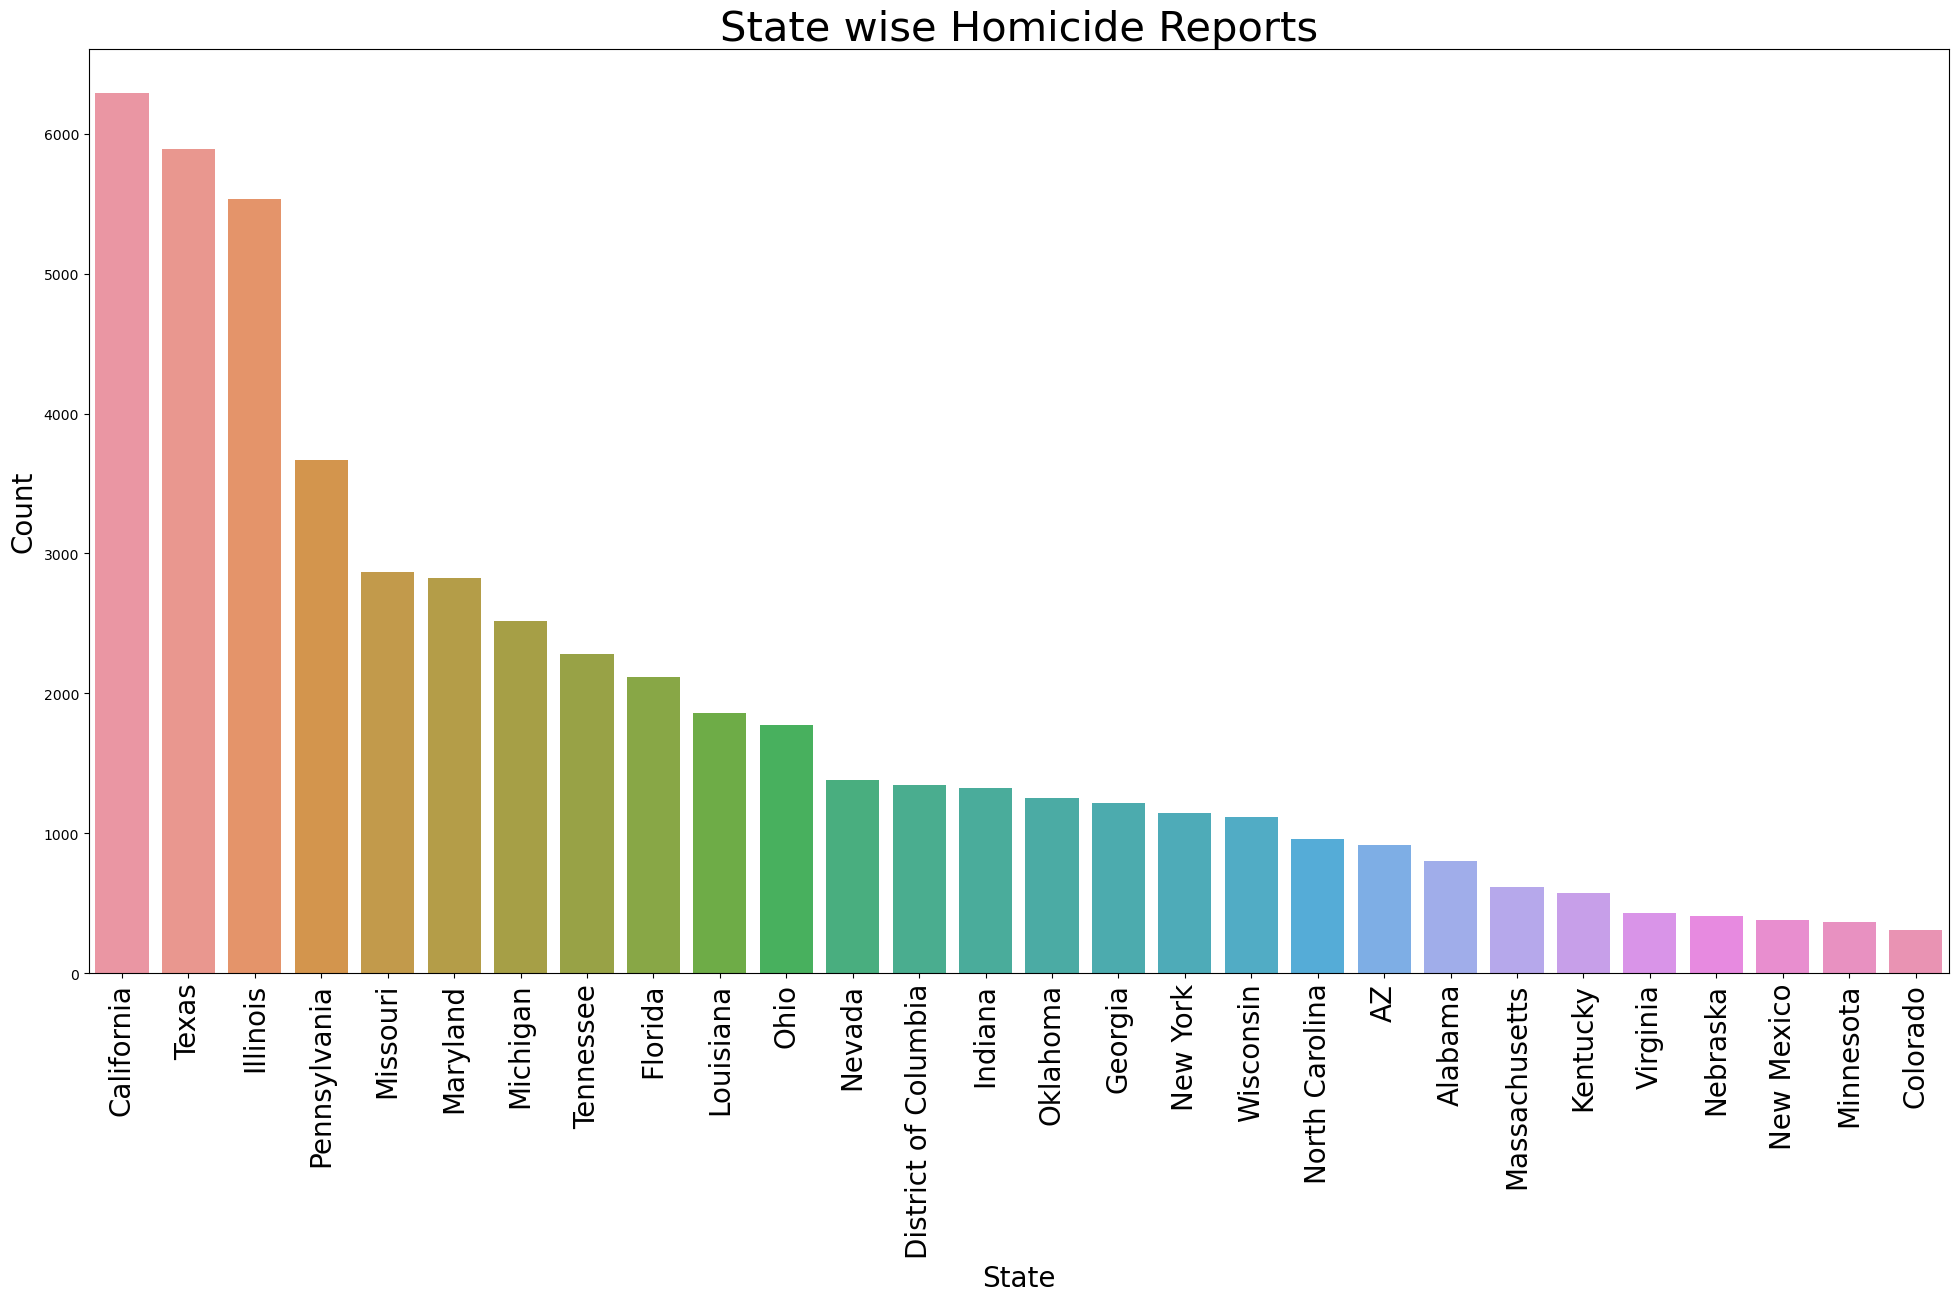

In [143]:
plt.figure(figsize=(24,12))
sns.barplot(x='State',y='Count',data=df_state)
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('State wise Homicide Reports',fontsize=30)

# Observation
- in States we Have **California** is Suffering with **Highest** Homicide Cases
- in States we Have **Illinois** is Suffering with **Secong Highest** Homicide Cases
- in States we Have **Colorado** is Suffering with **Less** Homicide Cases

In [144]:
# Top 5
df_top_5_state=df_state.head(5)

In [145]:
df_top_5_state

,State,Count
0,California,6288
1,Texas,5891
2,Illinois,5535
3,Pennsylvania,3668
4,Missouri,2867


Text(0.5, 1.0, 'Top 5 States That Having Homicide Cases')

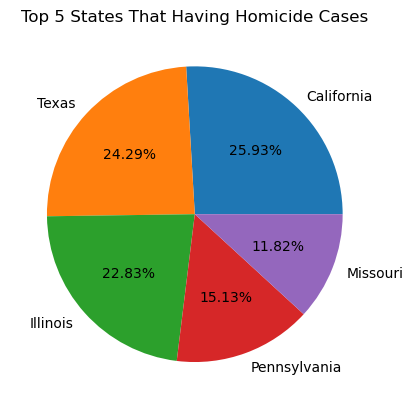

In [146]:
plt.pie(x='Count',labels='State',data=df_top_5_state,autopct='%1.2f%%')
plt.title("Top 5 States That Having Homicide Cases")

# Observation
- in Top 5 States we Have **California** is Suffering with **Highest** Homicide Cases
- in Top 5 States we Have **Illinois** is Suffering with **Secong Highest** Homicide Cases
- in Top 5 States we Have **Missouri** is Suffering with **Less** Homicide Cases

In [147]:
df_bottom_5_state= df_state.tail(5)

In [148]:
df_bottom_5_state

,State,Count
23,Virginia,429
24,Nebraska,409
25,New Mexico,378
26,Minnesota,366
27,Colorado,312


Text(0.5, 1.0, 'Bottom 5 States That Having Homicide Cases')

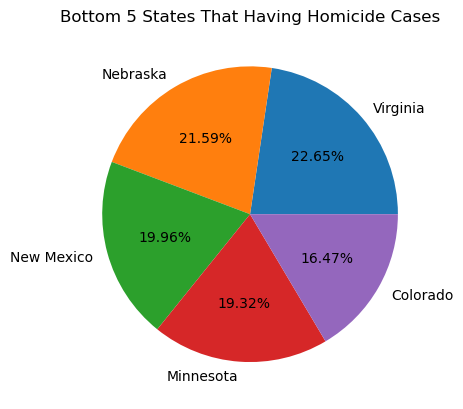

In [149]:
plt.pie(x='Count',labels='State',data=df_bottom_5_state,autopct='%1.2f%%')
plt.title("Bottom 5 States That Having Homicide Cases")

# Observation
- in Bottom 5 States we Have **Nebraska** is Suffering with **Highest** Homicide Cases
- in Bottom 5 States we Have **Minnesota** is Suffering with **Secong Highest** Homicide Cases
- in Bottom 5 States we Have **Colorado** is Suffering with **Less** Homicide Cases

# disposition

In [150]:
df_disposition= df['disposition'].value_counts().reset_index()
df_disposition.columns=['disposition','Count']

In [151]:
df_disposition

,disposition,Count
0,Closed by arrest,25674
1,Open/No arrest,23583
2,Closed without arrest,2922


Text(0.5, 1.0, 'Disposition Count')

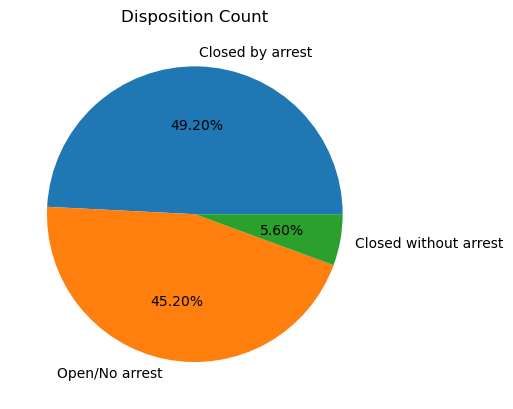

In [152]:
plt.pie(x='Count',labels='disposition',data=df_disposition,autopct='%1.2f%%')
plt.title ("Disposition Count")

# Observation
- It seems that the Homicide cases are bit challenging To the police.

## Until Now we Did EDA For every  individual Column.
### But we also need to Do Eda with column v/s column like finding the comparasion between columns
#### we Do Eda on
- victim_race V/s city
- victim_race V/s victim_state
- victim_race V/s victim_disposition
- and 
- victim_sex V/s city
- victim_sex V/s victim_state
- victim_sex V/s victim_disposition


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49180 entries, 0 to 52178
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            49180 non-null  object        
 1   reported_date  49180 non-null  datetime64[ns]
 2   victim_race    49180 non-null  object        
 3   victim_age     49180 non-null  int32         
 4   victim_sex     49180 non-null  object        
 5   city           49180 non-null  object        
 6   state          49180 non-null  object        
 7   disposition    49180 non-null  object        
 8   year           49180 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(6)
memory usage: 3.6+ MB


# Race V/s City

In [154]:
df_Race_City = df.groupby('victim_race')['city'].value_counts().reset_index(name='Count')

In [155]:
df_Race_City

,victim_race,city,Count
0,Asian,Houston,91
1,Asian,Las Vegas,55
2,Asian,Philadelphia,48
3,Asian,Sacramento,48
4,Asian,Long Beach,47
...,...,...,...
250,White,Washington,42
251,White,Baton Rouge,35
252,White,Richmond,32
253,White,San Bernardino,31


In [161]:
# Segregating the data into Race wise so that we can plot graphs for each race
df_Asian=df_Race_City.loc[df_Race_City['victim_race']== 'Asian']
df_Black=df_Race_City.loc[df_Race_City['victim_race']== 'Black']
df_Other=df_Race_City.loc[df_Race_City['victim_race']== 'Other']
df_Unknown=df_Race_City.loc[df_Race_City['victim_race']== 'Unknown']
df_Hispanic=df_Race_City.loc[df_Race_City['victim_race']== 'Hispanic']
df_White=df_Race_City.loc[df_Race_City['victim_race']== 'White']

In [162]:
# Top 10 Citys againest Race
df_top_10_city_Asian= df_Asian.head(10)
df_top_10_city_Black= df_Black.head(10)
df_top_10_city_Hispanic= df_Hispanic.head(10)
df_top_10_city_White= df_White.head(10)
df_top_10_city_Unknown= df_Unknown.head(10)
df_top_10_city_Other= df_Other.head(10)

Text(0.5, 1.0, 'White')

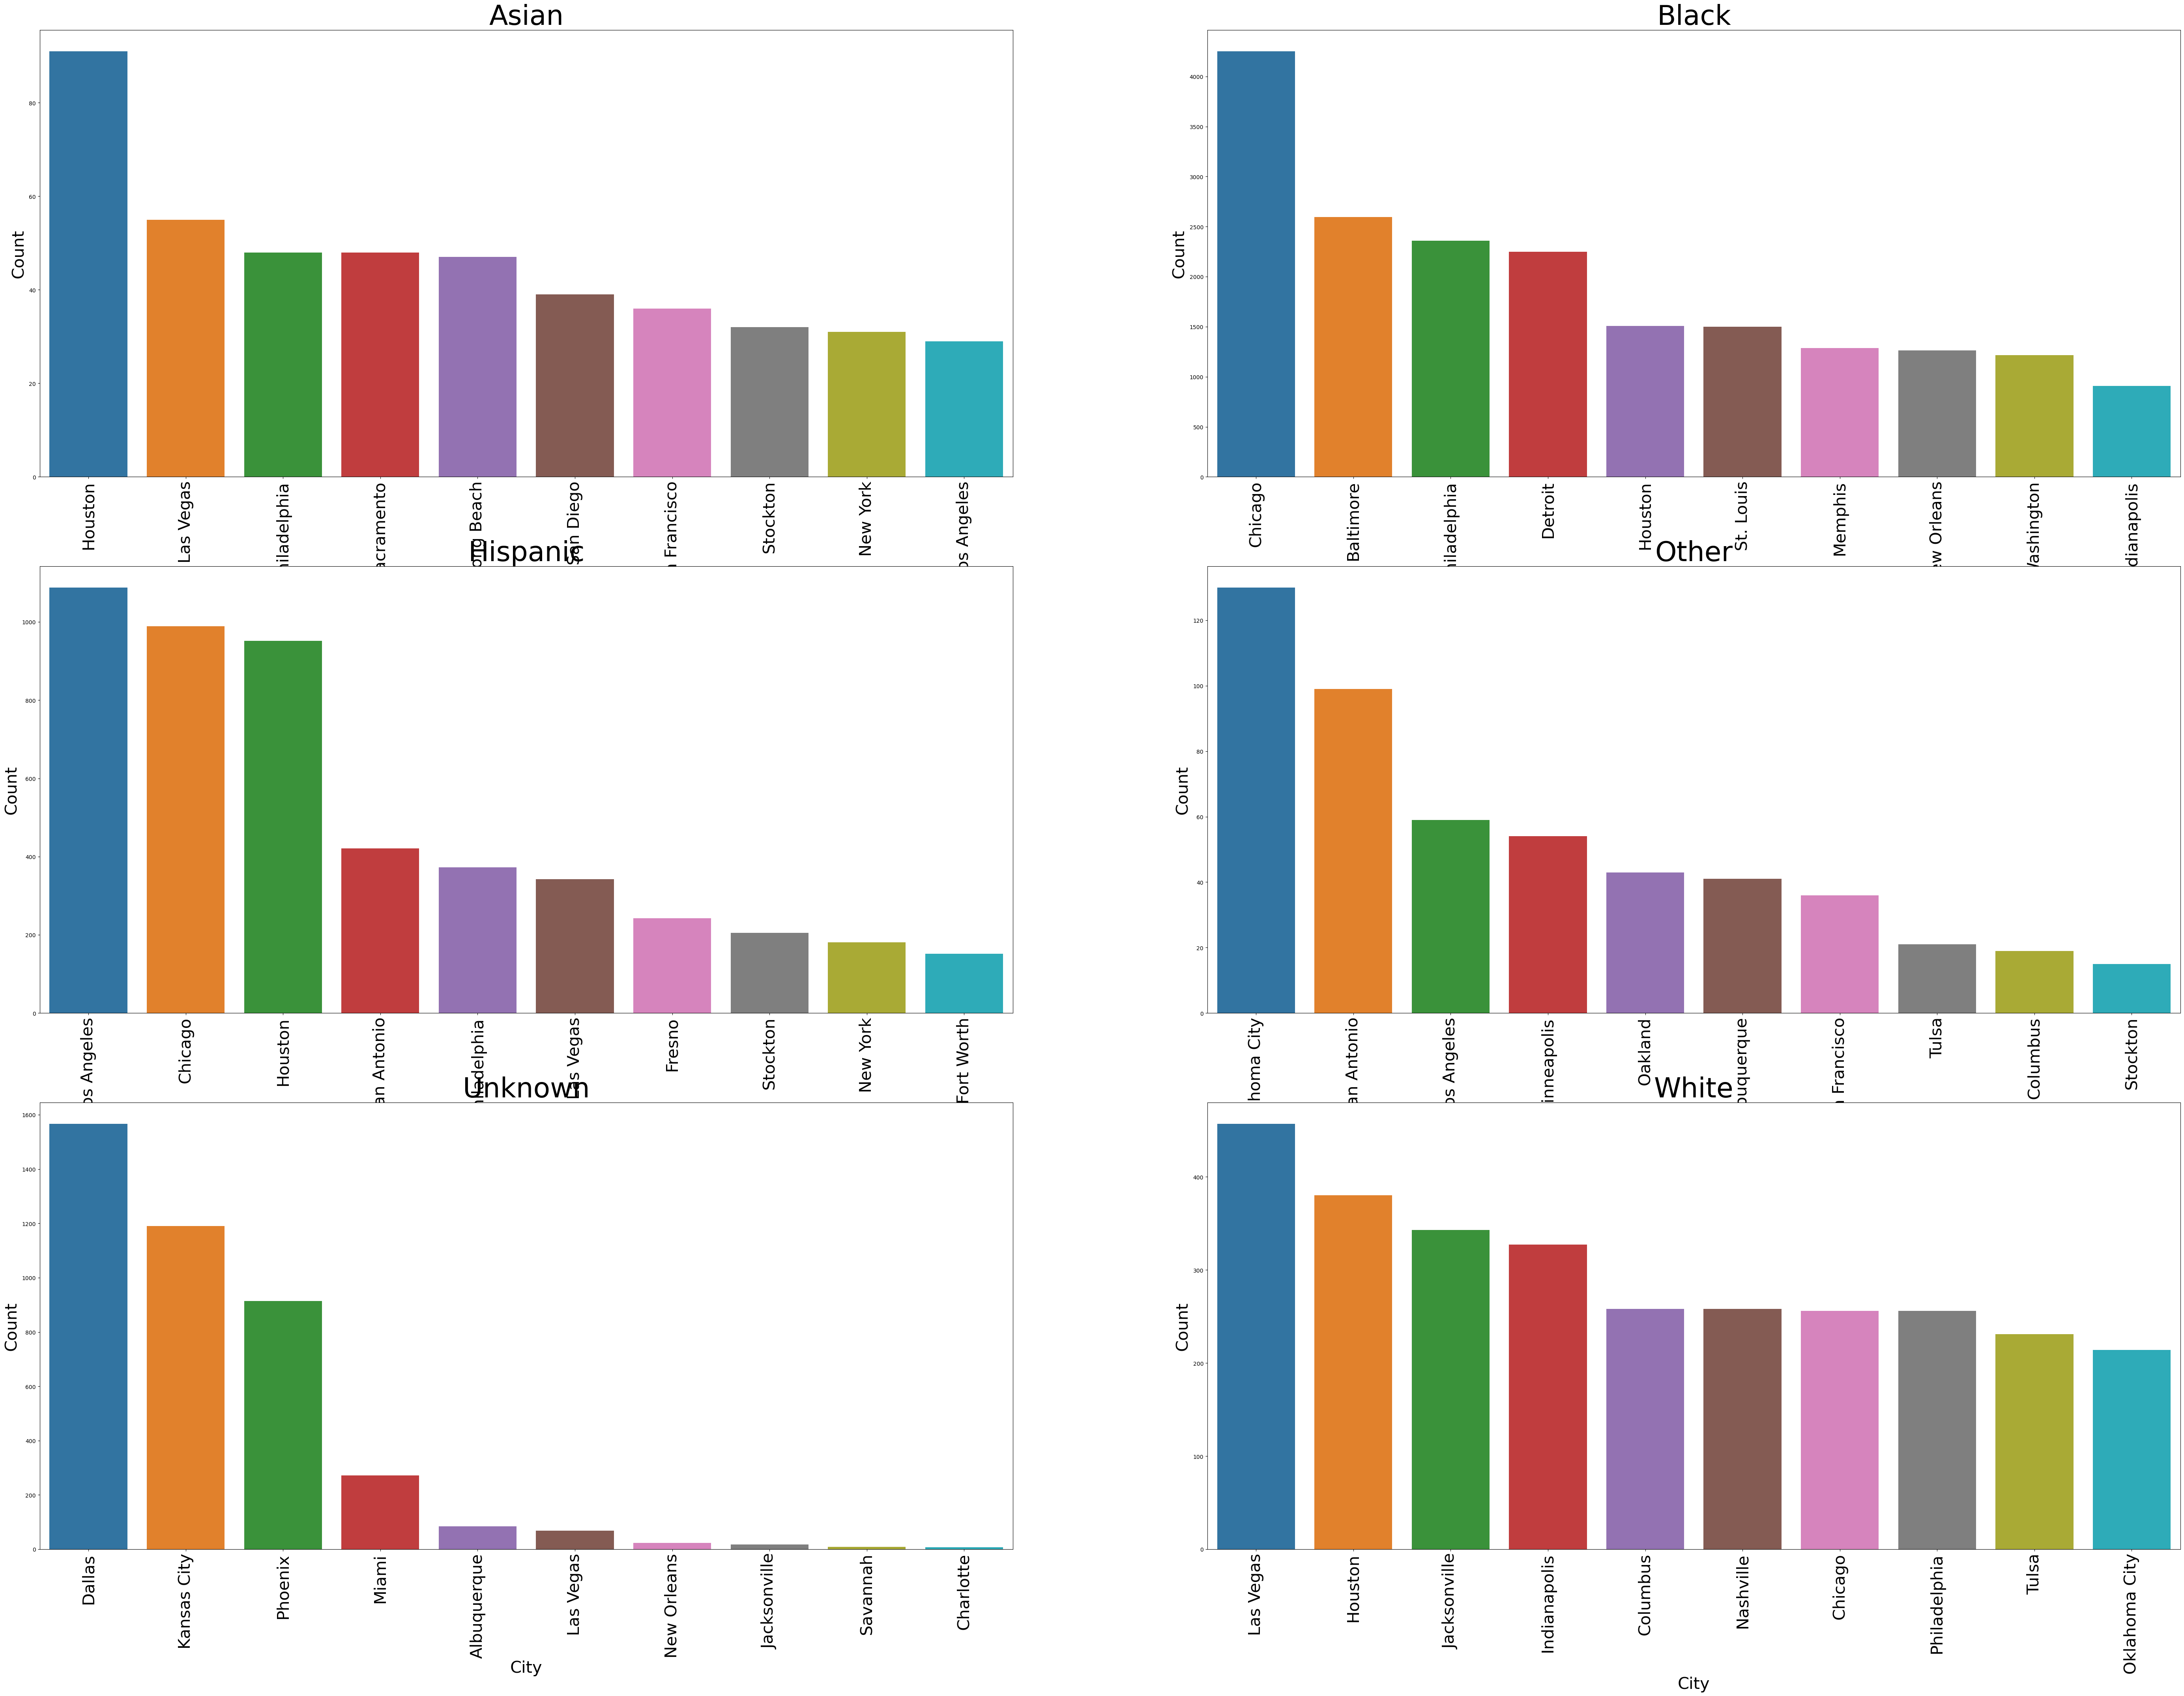

In [163]:
plt.figure(figsize=(70,50))
plt.subplot(3,2,1)
sns.barplot(x='city',y='Count',data=df_top_10_city_Asian)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Asian",fontsize=50)

plt.subplot(3,2,2)
sns.barplot(x='city',y='Count',data=df_top_10_city_Black)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Black",fontsize=50)

plt.subplot(3,2,3)
sns.barplot(x='city',y='Count',data=df_top_10_city_Hispanic)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Hispanic",fontsize=50)

plt.subplot(3,2,4)
sns.barplot(x='city',y='Count',data=df_top_10_city_Other)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Other",fontsize=50)

plt.subplot(3,2,5)
sns.barplot(x='city',y='Count',data=df_top_10_city_Unknown)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Unknown",fontsize=50)

plt.subplot(3,2,6)
sns.barplot(x='city',y='Count',data=df_top_10_city_White)
plt.xlabel('City',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("White",fontsize=50)

# Observation
- From above the graphs we can see
- **Asian :** The **Housten** city has highest homicide cases againest **Asian**
- **Black :** The **Chicago** city has highest homicide cases againest **Black**
- **Hispanic :** The **Lass Angeles** city has highest homicide cases againest **Hispanic**
- **Other :** The **Oklahoma City** city has highest homicide cases againest **Other**
- **Unknown :** The **Kansas** city has highest homicide cases againest **Unknown**
- **White :** The **Las Vegas** city has highest homicide cases againest **White**

# Race V/s State

In [164]:
df_Race_state= df.groupby('victim_race')['state'].value_counts().reset_index(name='Count')

In [165]:
df_Race_state

,victim_race,state,Count
0,Asian,CA,281
1,Asian,TX,97
2,Asian,NV,55
3,Asian,PA,51
4,Asian,NY,33
...,...,...,...
151,White,AL,66
152,White,MA,57
153,White,MN,51
154,White,DC,42


In [166]:
# Filtering the data base on Victim_ Race and Race category
df_state_Asian = df_Race_state.loc[df_Race_state['victim_race']=='Asian']
df_state_Black = df_Race_state.loc[df_Race_state['victim_race']=='Black']
df_state_White = df_Race_state.loc[df_Race_state['victim_race']=='White']
df_state_Hispanic = df_Race_state.loc[df_Race_state['victim_race']=='Hispanic']
df_state_Unknown = df_Race_state.loc[df_Race_state['victim_race']=='Unknown']
df_state_Other = df_Race_state.loc[df_Race_state['victim_race']=='Other']

In [167]:
# Filtering the top 10 states data base on Victim_ Race and Race category
df_top_10_state_race_Asian = df_state_Asian.head(10)
df_top_10_state_race_Black = df_state_Black.head(10)
df_top_10_state_race_White = df_state_White.head(10)
df_top_10_state_race_Hispanic = df_state_Hispanic.head(10)
df_top_10_state_race_Unknown = df_state_Unknown.head(10)
df_top_10_state_race_Other = df_state_Other.head(10)

Text(0.5, 1.0, 'White')

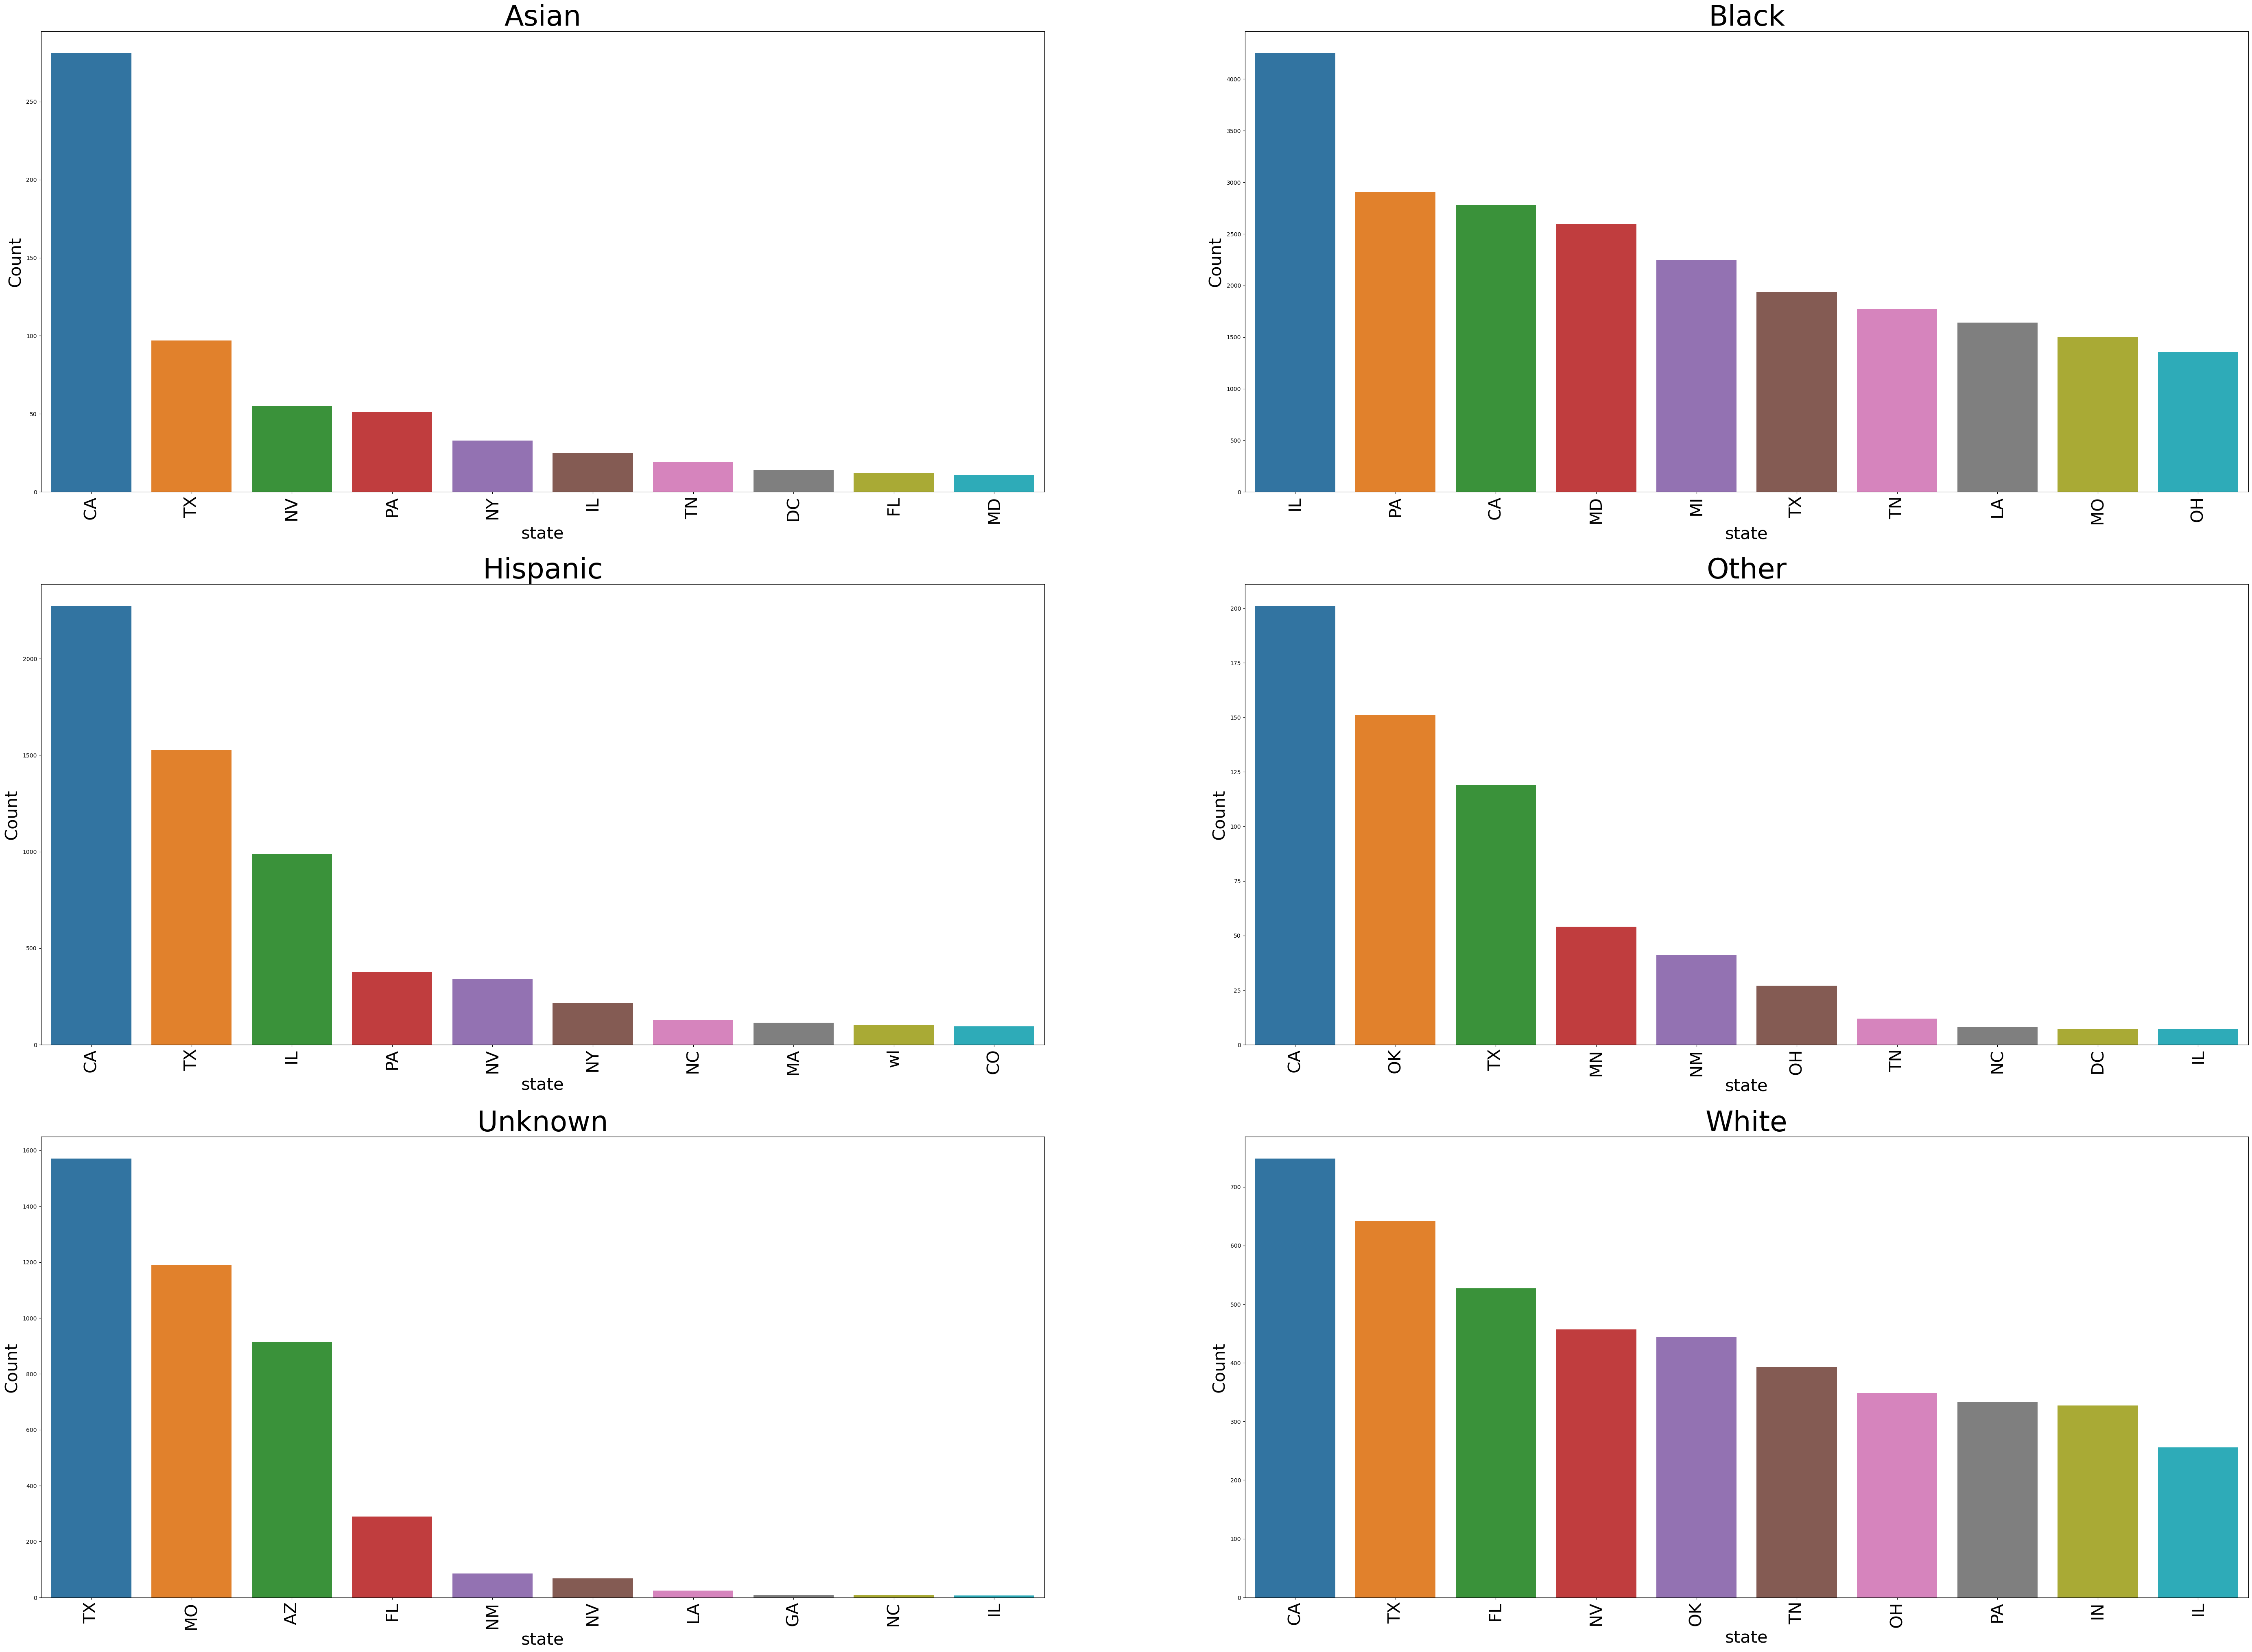

In [168]:
plt.figure(figsize=(70,50))
plt.subplot(3,2,1)
sns.barplot(x='state',y='Count',data=df_top_10_state_race_Asian)
plt.xlabel('state',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Asian",fontsize=50)

plt.subplot(3,2,2)
sns.barplot(x='state',y='Count',data=df_top_10_state_race_Black)
plt.xlabel('state',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Black",fontsize=50)

plt.subplot(3,2,3)
sns.barplot(x='state',y='Count',data=df_top_10_state_race_Hispanic)
plt.xlabel('state',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Hispanic",fontsize=50)

plt.subplot(3,2,4)
sns.barplot(x='state',y='Count',data=df_top_10_state_race_Other)
plt.xlabel('state',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Other",fontsize=50)

plt.subplot(3,2,5)
sns.barplot(x='state',y='Count',data=df_top_10_state_race_Unknown)
plt.xlabel('state',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("Unknown",fontsize=50)

plt.subplot(3,2,6)
sns.barplot(x='state',y='Count',data=df_top_10_state_race_White)
plt.xlabel('state',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.title("White",fontsize=50)

# Observation
- From above the graphs we can see
- **Asian :** The **California** state has highest homicide cases againest **Asian**
- **Black :** The **Illinois** state has highest homicide cases againest **Black**
- **Hispanic :** The **California** state has highest homicide cases againest **Hispanic**
- **Other :** The **California** state has highest homicide cases againest **Other**
- **Unknown :** The **Missouri** state has highest homicide cases againest **Unknown**
- **White :** The **California** state has highest homicide cases againest **White**
- Out 6 Race 4 found difficulty in **California State**. It seems that majority of homicide cases have been reported in **California State**. 

# victim_race V/s victim_disposition

In [169]:
df_Race_disposition= df.groupby('victim_race')['disposition'].value_counts().reset_index(name='Count')

In [170]:
df_Race_disposition

,victim_race,disposition,Count
0,Asian,Closed by arrest,410
1,Asian,Open/No arrest,203
2,Asian,Closed without arrest,72
3,Black,Open/No arrest,16403
4,Black,Closed by arrest,15462
5,Black,Closed without arrest,1496
6,Hispanic,Closed by arrest,3332
7,Hispanic,Open/No arrest,3168
8,Hispanic,Closed without arrest,401
9,Other,Closed by arrest,366


In [171]:
df_Race_disposition_Asian= df_Race_disposition.loc[df_Race_disposition['victim_race']=='Asian']
df_Race_disposition_Black= df_Race_disposition.loc[df_Race_disposition['victim_race']=='Black']
df_Race_disposition_White= df_Race_disposition.loc[df_Race_disposition['victim_race']=='White']
df_Race_disposition_Hispanic= df_Race_disposition.loc[df_Race_disposition['victim_race']=='Hispanic']
df_Race_disposition_Other= df_Race_disposition.loc[df_Race_disposition['victim_race']=='Other']
df_Race_disposition_Unknown= df_Race_disposition.loc[df_Race_disposition['victim_race']=='Unknown']

In [172]:
df_Race_disposition_Asian

,victim_race,disposition,Count
0,Asian,Closed by arrest,410
1,Asian,Open/No arrest,203
2,Asian,Closed without arrest,72


Text(0.5, 1.0, 'White')

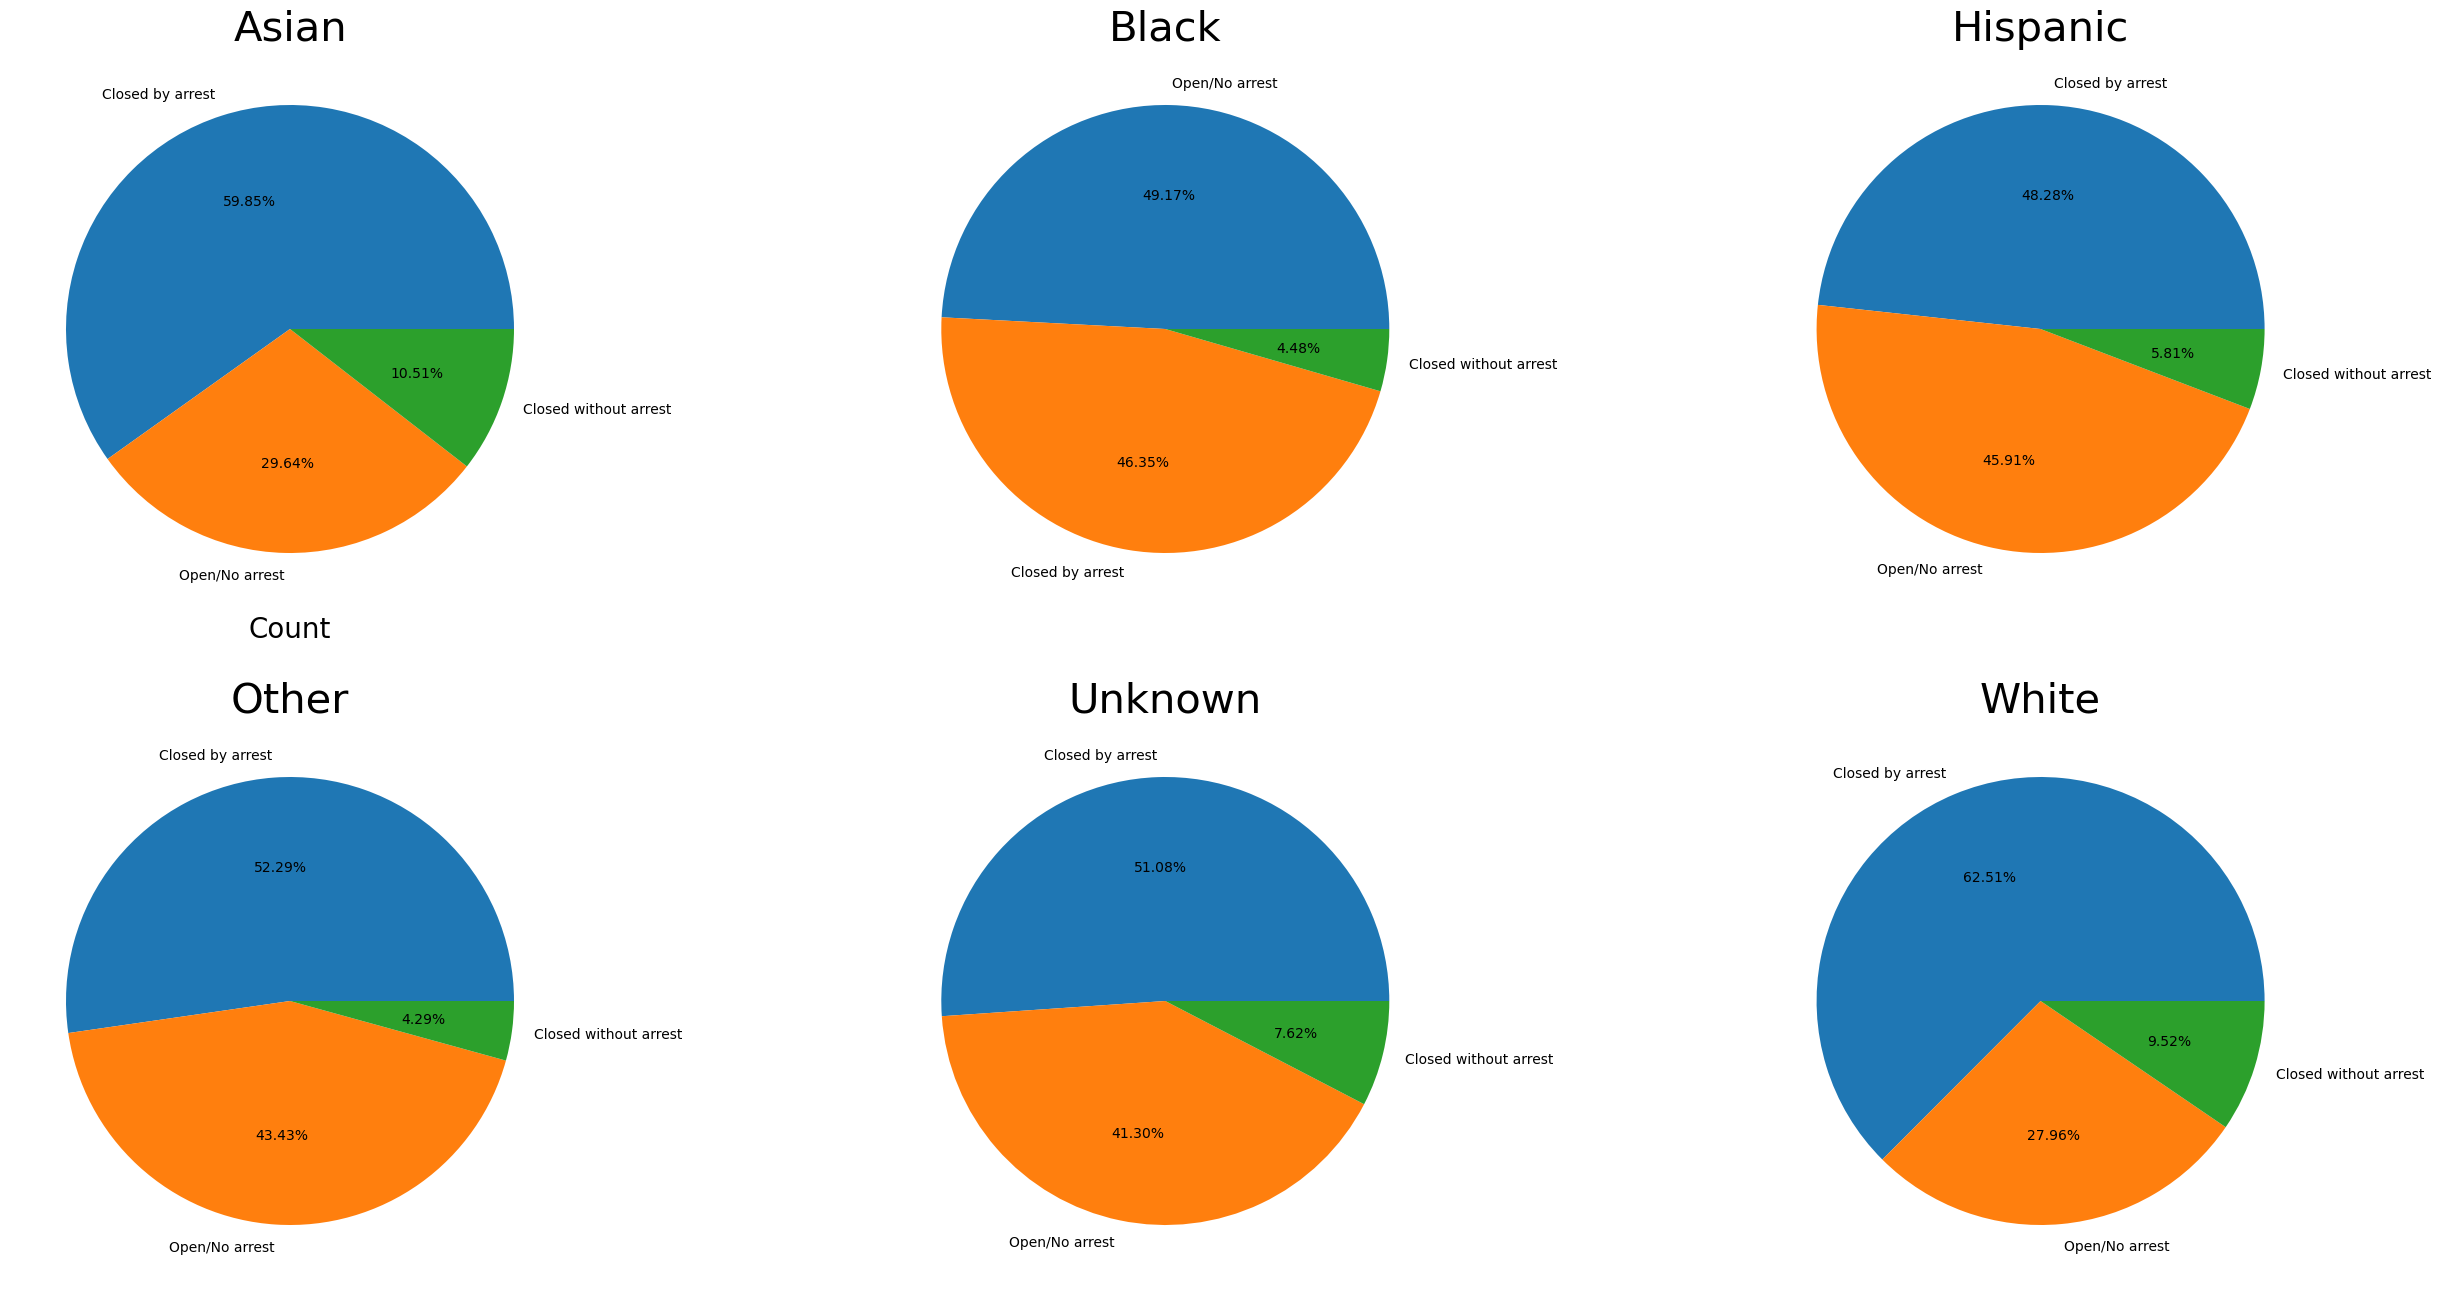

In [173]:
plt.figure(figsize=(32,16))
plt.subplot(2,3,1)
plt.pie(x='Count',labels='disposition',data=df_Race_disposition_Asian,autopct='%1.2f%%')
plt.xlabel('Count',fontsize=20)
plt.title("Asian",fontsize=30)


plt.subplot(2,3,2)
plt.pie(x='Count',labels='disposition',data=df_Race_disposition_Black,autopct='%1.2f%%')
plt.title("Black",fontsize=30)


plt.subplot(2,3,3)
plt.pie(x='Count',labels='disposition',data=df_Race_disposition_Hispanic,autopct='%1.2f%%')
plt.title("Hispanic",fontsize=30)


plt.subplot(2,3,4)
plt.pie(x='Count',labels='disposition',data=df_Race_disposition_Other,autopct='%1.2f%%')
plt.title("Other",fontsize=30)


plt.subplot(2,3,5)
plt.pie(x='Count',labels='disposition',data=df_Race_disposition_Unknown,autopct='%1.2f%%')
plt.title("Unknown",fontsize=30)


plt.subplot(2,3,6)
plt.pie(x='Count',labels='disposition',data=df_Race_disposition_White,autopct='%1.2f%%')
plt.title("White",fontsize=30)


# Observation
- From above the graphs we can see
- **Asian :** The **Closed By Arrest** Dispostion has highest Arrests. at the same time **Closed without arrests** is also higher than other Races.
- **Black:** The **Open /No Arrest** Dispostion has higher than the **Closed by arrest**
- **Hispanic :** The **Closed By Arrest** Dispostion has higher than the **Open /No Arrest**
- **Unknown :** The **Closed By Arrest** Dispostion has higher than the **Open /No Arrest**
- **White :** The **Closed By Arrest** Dispostion has higher than the **Open /No Arrest**
- **Other :** The **Closed By Arrest** Dispostion has higher than the **Open /No Arrest**
- Out 6 Race 5 found **Closed By Arrest** is high disposition.
- Only In the case of **Black Race** There is less Arrest than the Arrest. It seems that tha **Black Race** People Have Facing Difficulty in survival, Justice also

# victim_sex V/s city
## Female

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            52179 non-null  object 
 1   reported_date  52179 non-null  int64  
 2   victim_last    52178 non-null  object 
 3   victim_first   52179 non-null  object 
 4   victim_race    52179 non-null  object 
 5   victim_age     52179 non-null  object 
 6   victim_sex     52179 non-null  object 
 7   city           52179 non-null  object 
 8   state          52179 non-null  object 
 9   lat            52119 non-null  float64
 10  lon            52119 non-null  float64
 11  disposition    52179 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


In [175]:
df_sex_city = df.groupby('victim_sex')['city'].value_counts().reset_index(name='Count')

In [176]:
df_sex_city

,victim_sex,city,Count
0,Female,Chicago,576
1,Female,Houston,520
2,Female,Detroit,356
3,Female,Philadelphia,348
4,Female,Las Vegas,333
...,...,...,...
123,Unknown,Richmond,1
124,Unknown,San Antonio,1
125,Unknown,San Bernardino,1
126,Unknown,Stockton,1


In [177]:
df_Female_City = df_sex_city.loc[df_sex_city['victim_sex']=='Female']

In [178]:
df_Female_City

,victim_sex,city,Count
0,Female,Chicago,576
1,Female,Houston,520
2,Female,Detroit,356
3,Female,Philadelphia,348
4,Female,Las Vegas,333
5,Female,Los Angeles,302
6,Female,Memphis,262
7,Female,Baltimore,258
8,Female,Jacksonville,251
9,Female,Indianapolis,249


Text(0.5, 1.0, "Homicide Reports for the Female accross All City's")

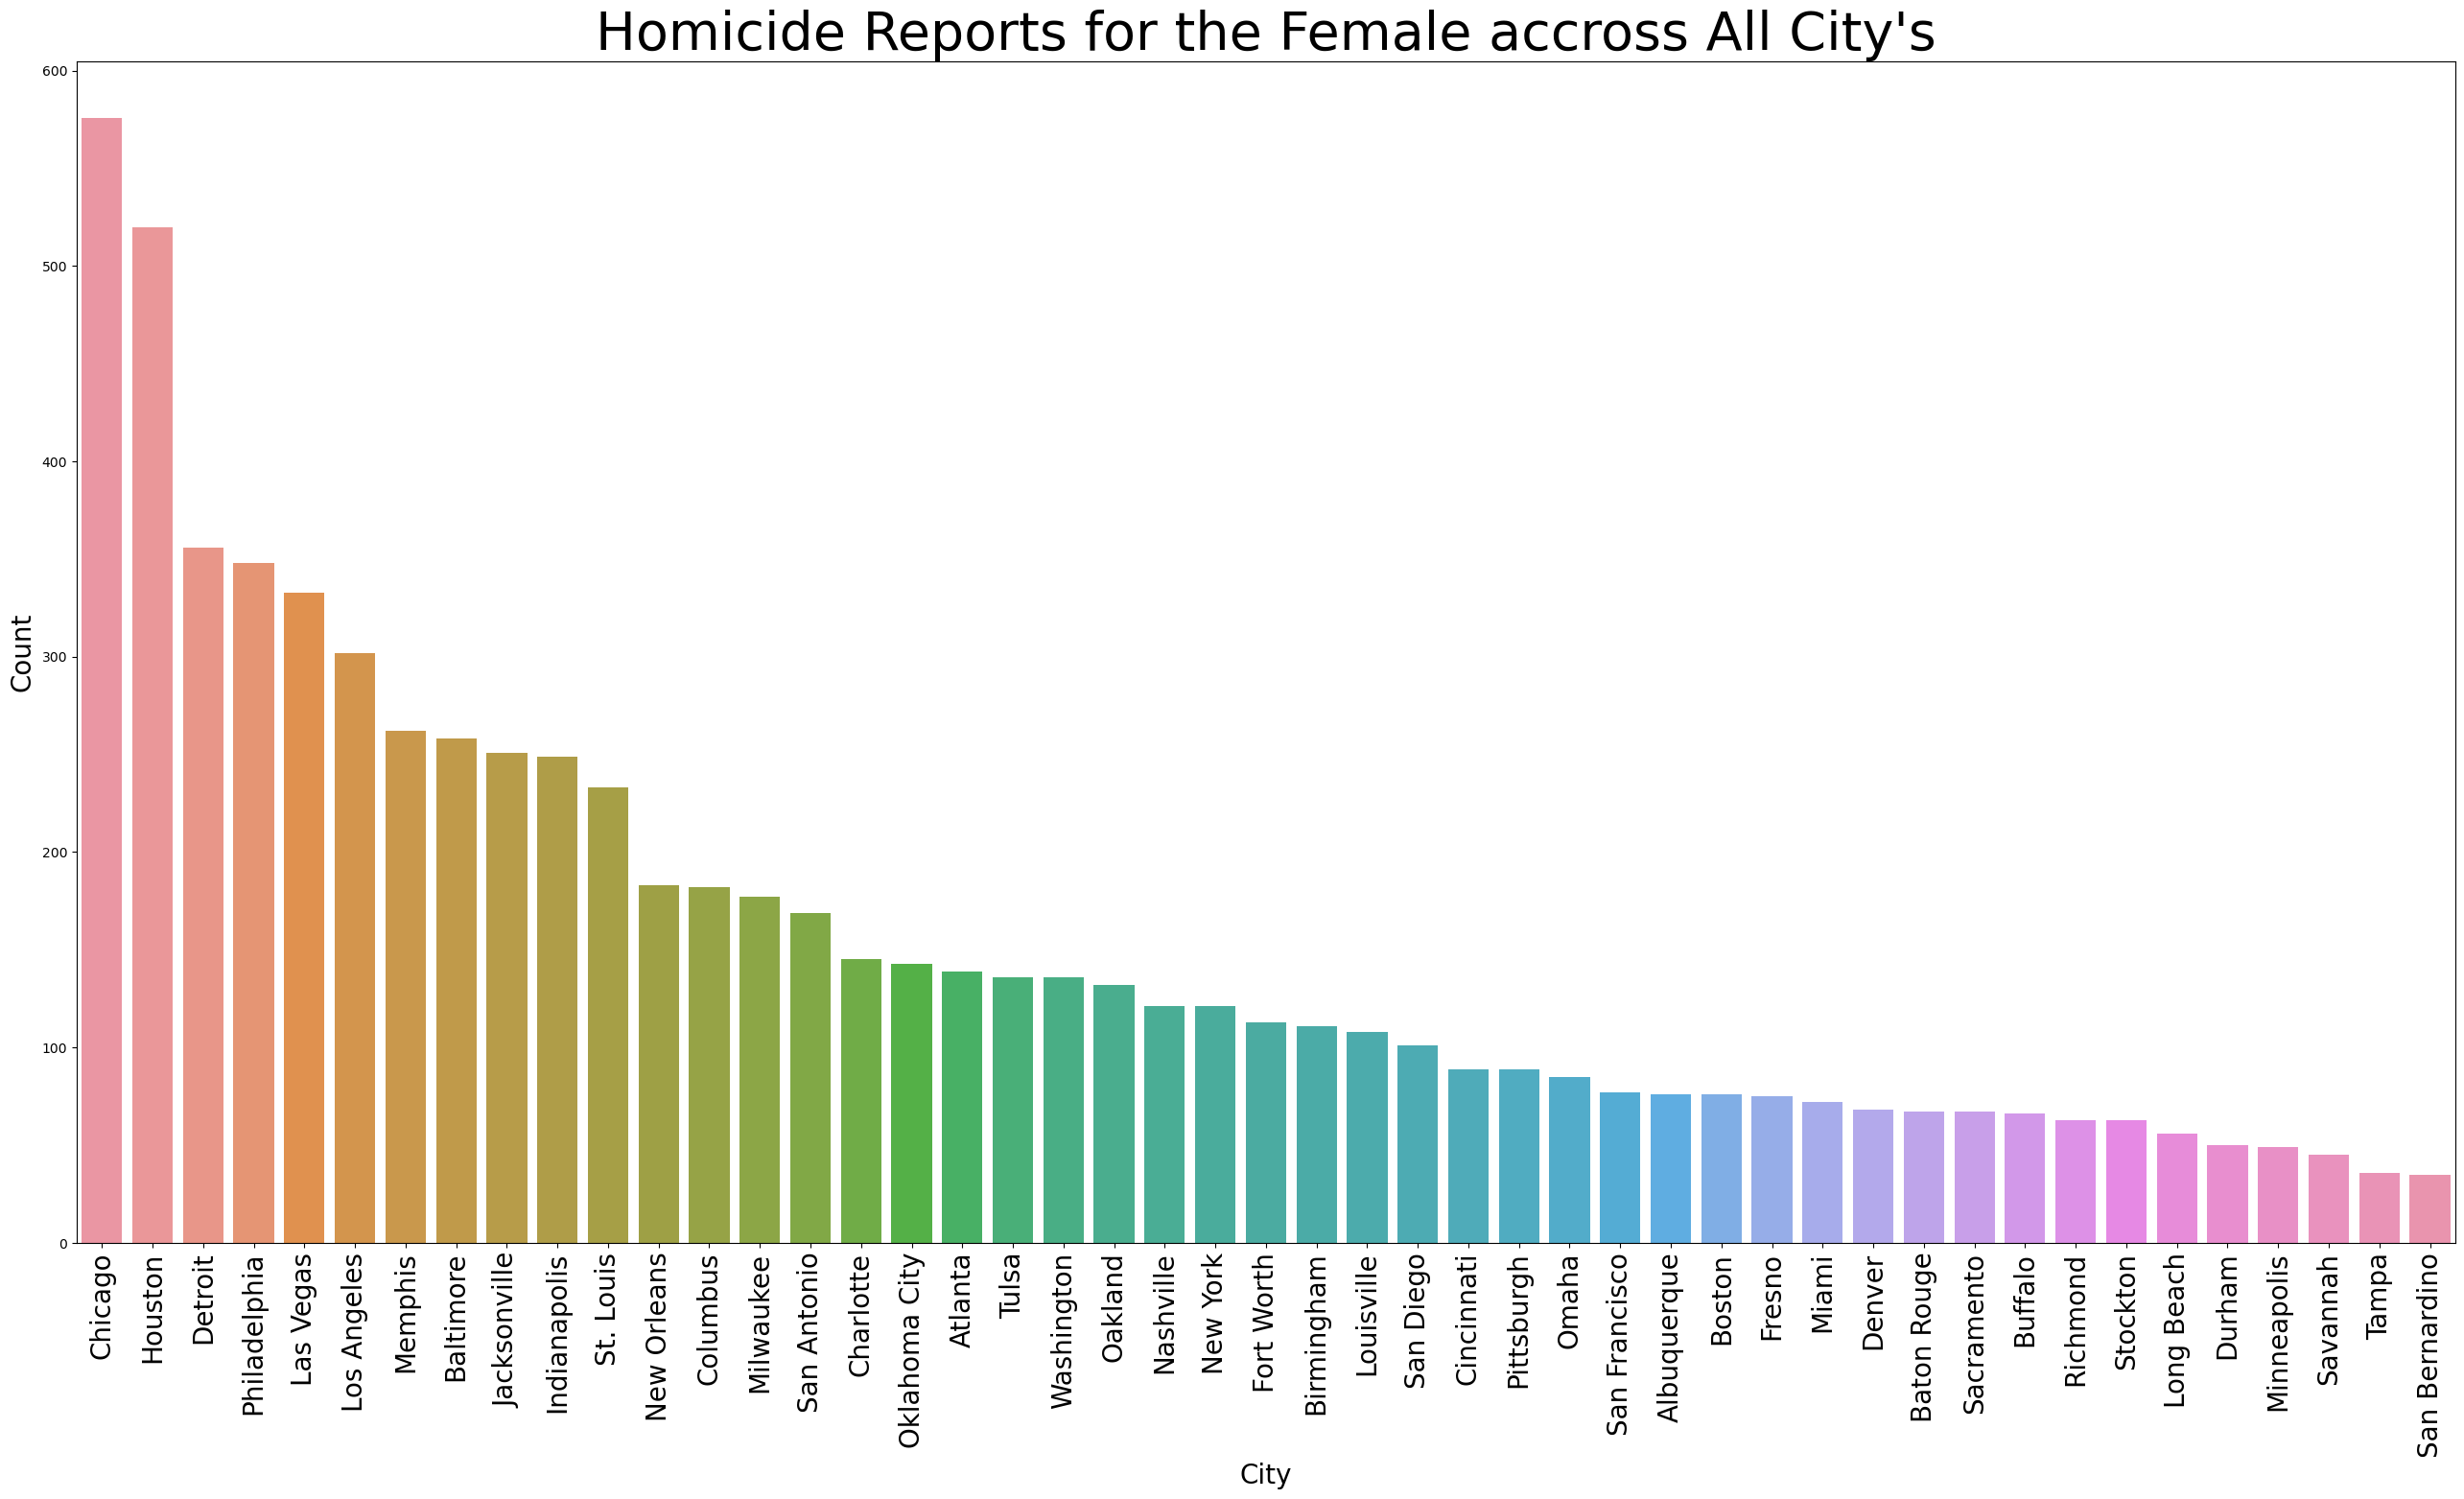

In [179]:
plt.figure(figsize=(32,16))
sns.barplot(x='city',y='Count',data=df_Female_City)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Homicide Reports for the Female accross All City's",fontsize=40)

In [180]:
# Since we have 46 Records we take top and bottom 10 records only
df_top_10_Female_City=df_Female_City.head(10)

Text(0.5, 1.0, "Homicide Reports for the Female in Top 10 City's")

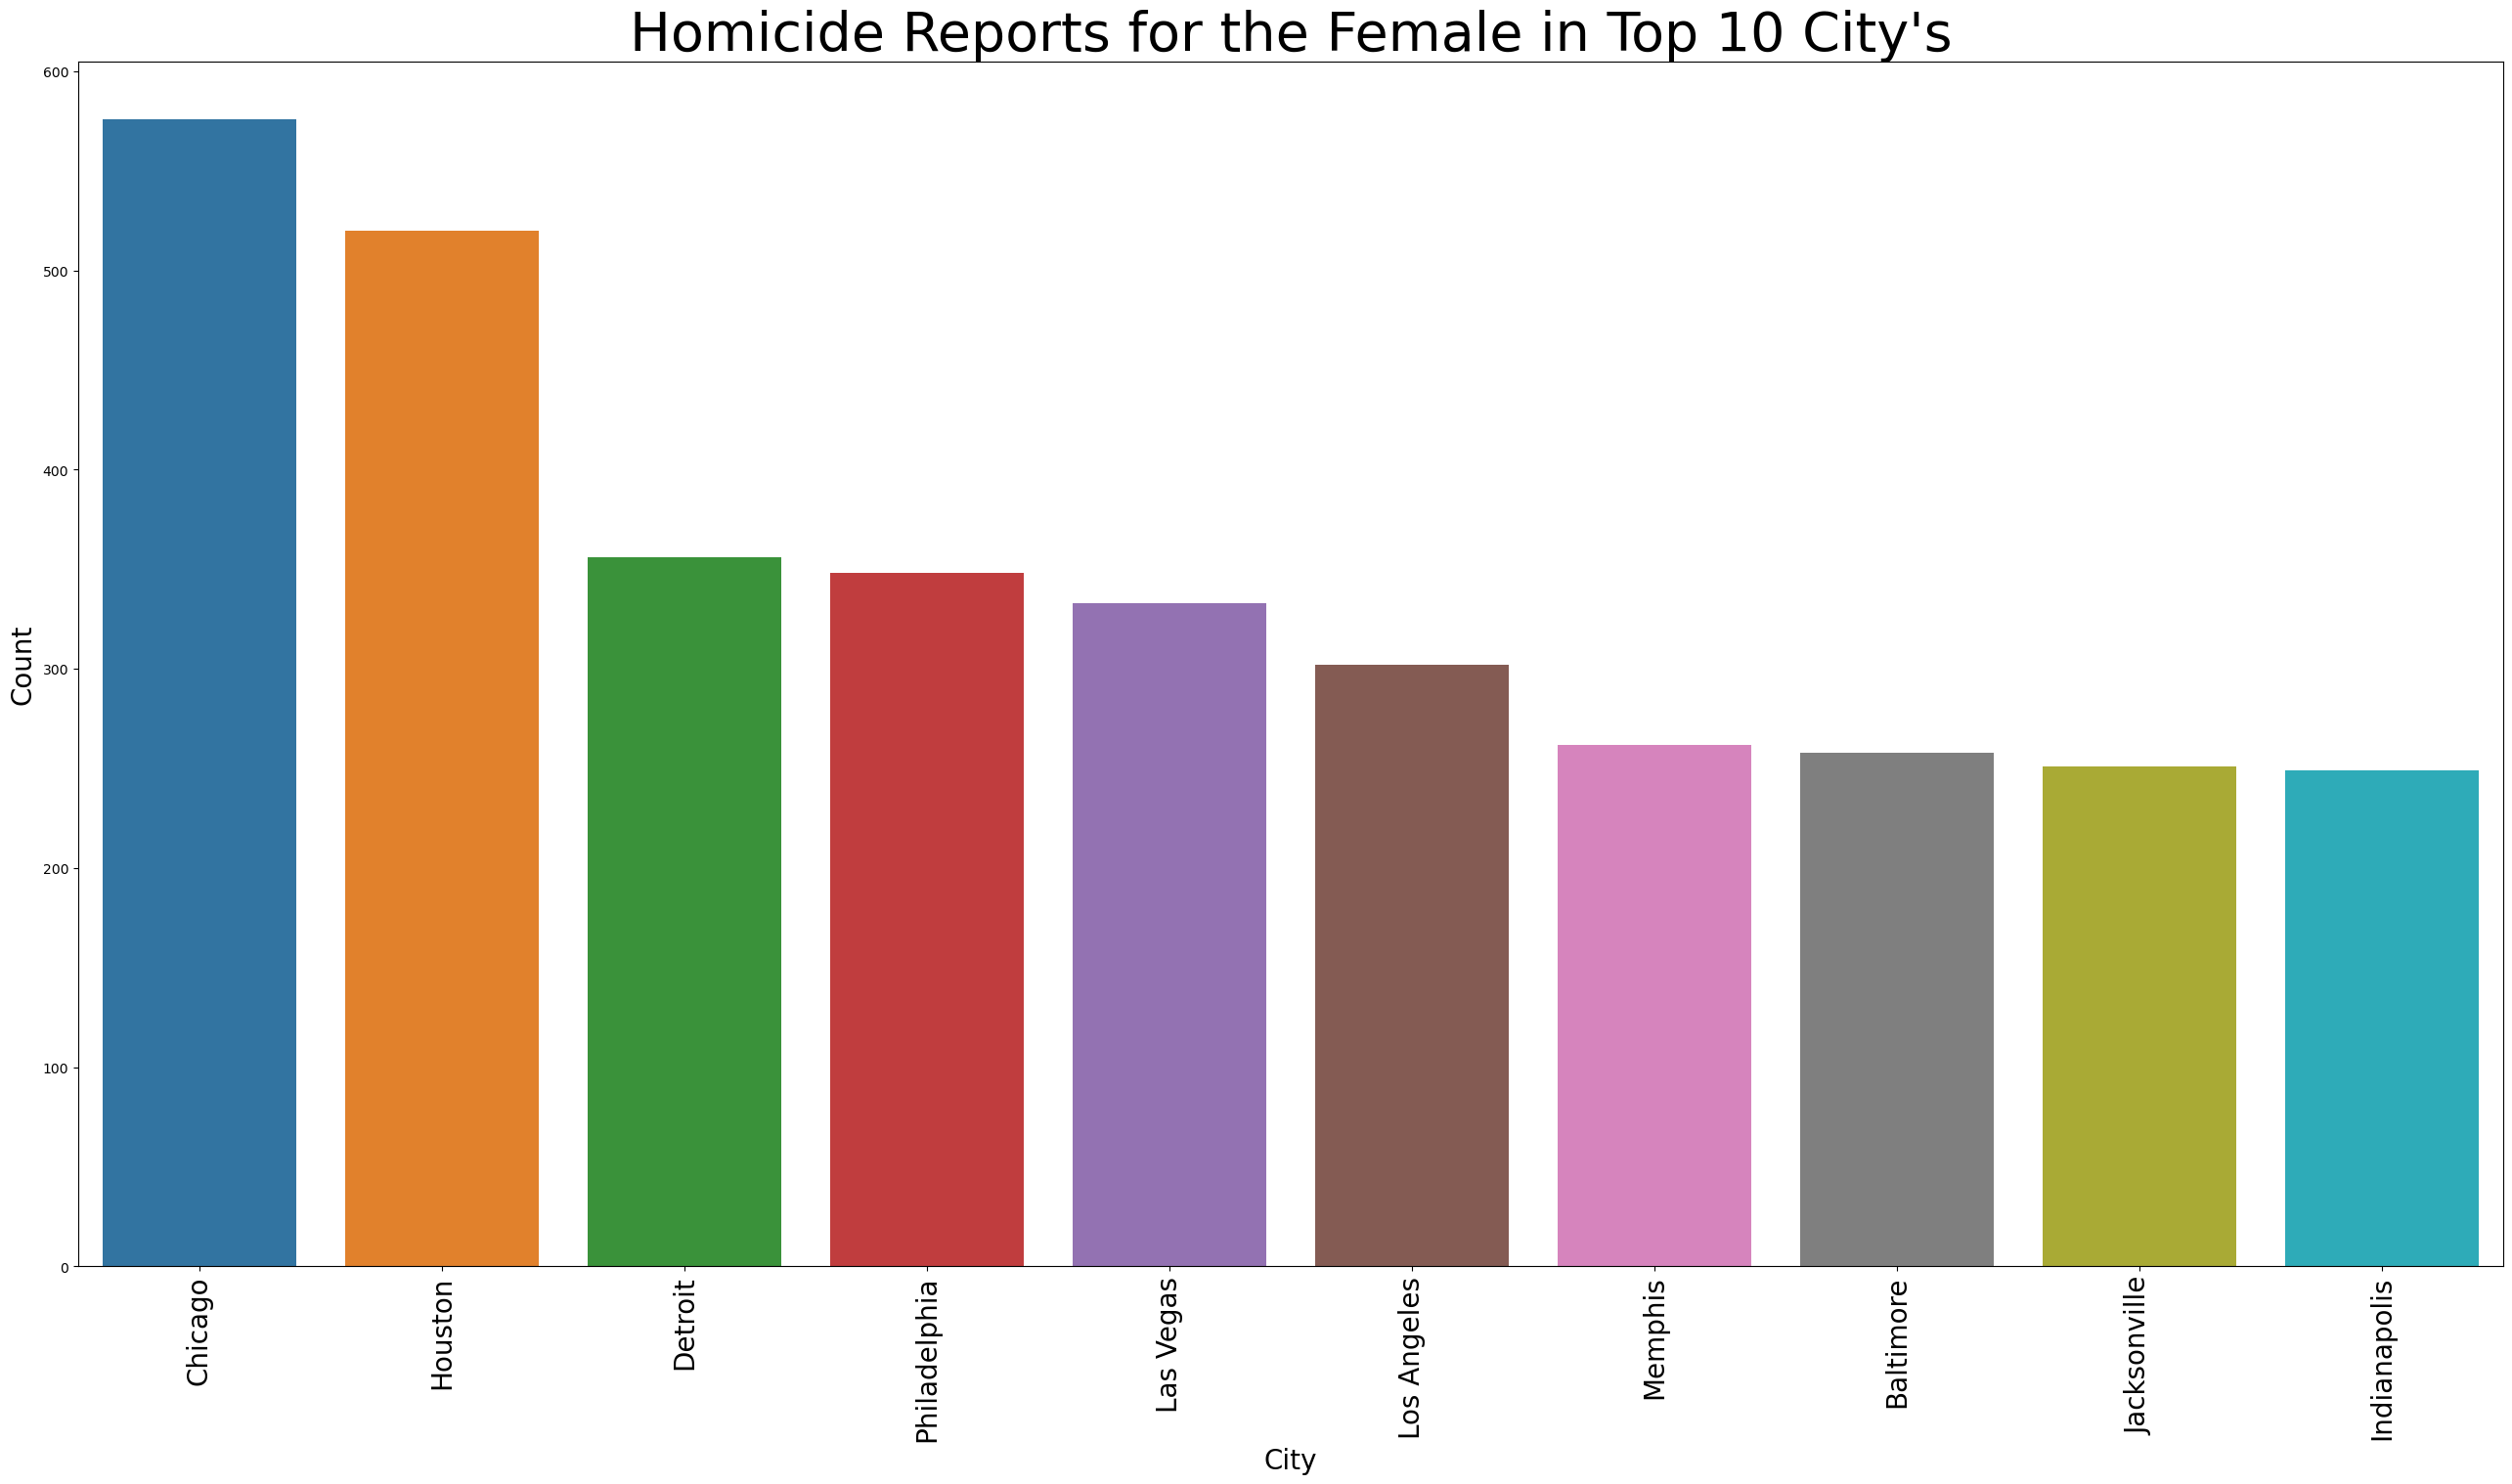

In [181]:
plt.figure(figsize=(32,16))
sns.barplot(x='city',y='Count',data=df_top_10_Female_City)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Homicide Reports for the Female in Top 10 City's",fontsize=40)


## Observation
- **Highest** : Female People of **Chicago** state have suffering with high homicide incidents Highest
- **Second Highest** : Female People of **Houston** state have suffering with high homicide incidents Second Highest

## Male

In [182]:
df_Male_City = df_sex_city.loc[df_sex_city['victim_sex']=='Male']

In [183]:
df_Male_City

,victim_sex,city,Count
47,Male,Chicago,4952
48,Male,Philadelphia,2689
49,Male,Baltimore,2569
50,Male,Houston,2419
51,Male,Detroit,2162
52,Male,Los Angeles,1951
53,Male,St. Louis,1444
54,Male,Memphis,1251
55,Male,New Orleans,1227
56,Male,Washington,1173


Text(0.5, 1.0, 'Homicide Incendents againest male in all citys')

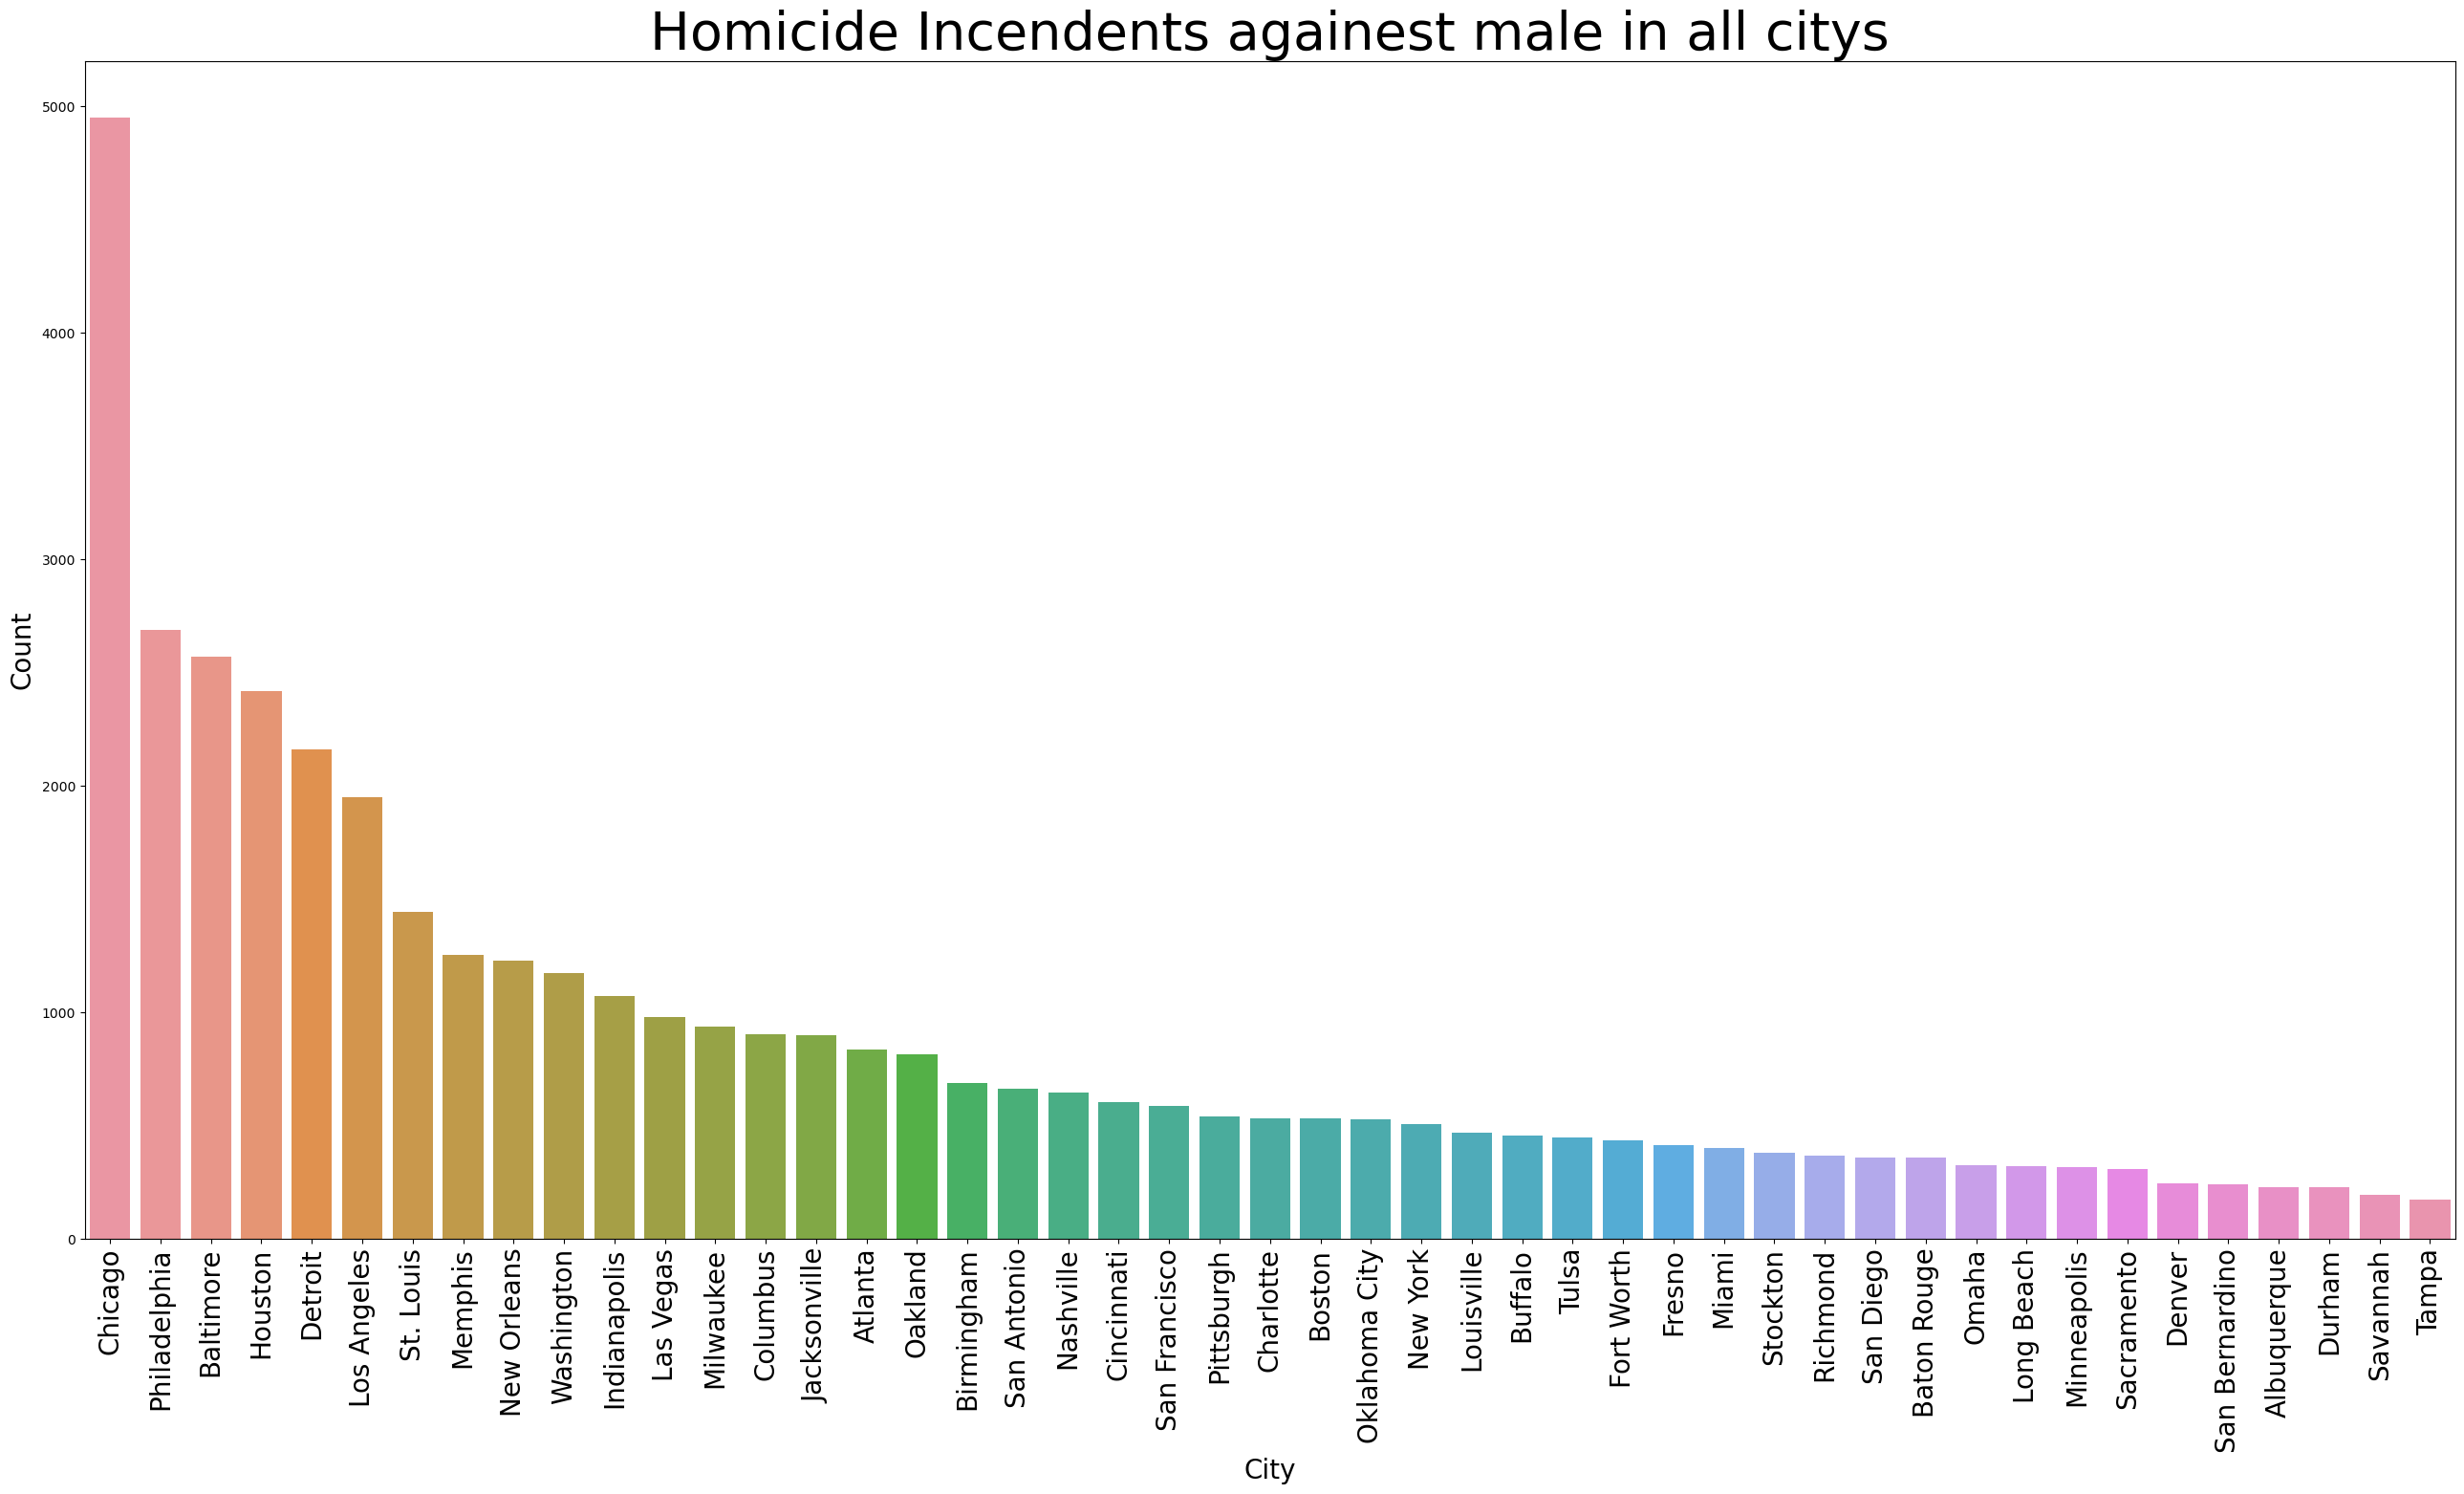

In [184]:
plt.figure(figsize=(32,16))
sns.barplot(x='city',y='Count',data=df_Male_City)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Homicide Incendents againest male in all citys",fontsize=40)

In [185]:
# Since we have 95 Records we take top  10 records only
df_top_10_Male_City=df_Male_City.head(10)

Text(0.5, 1.0, 'Homicide Incendents againest Male Top 10 Citys')

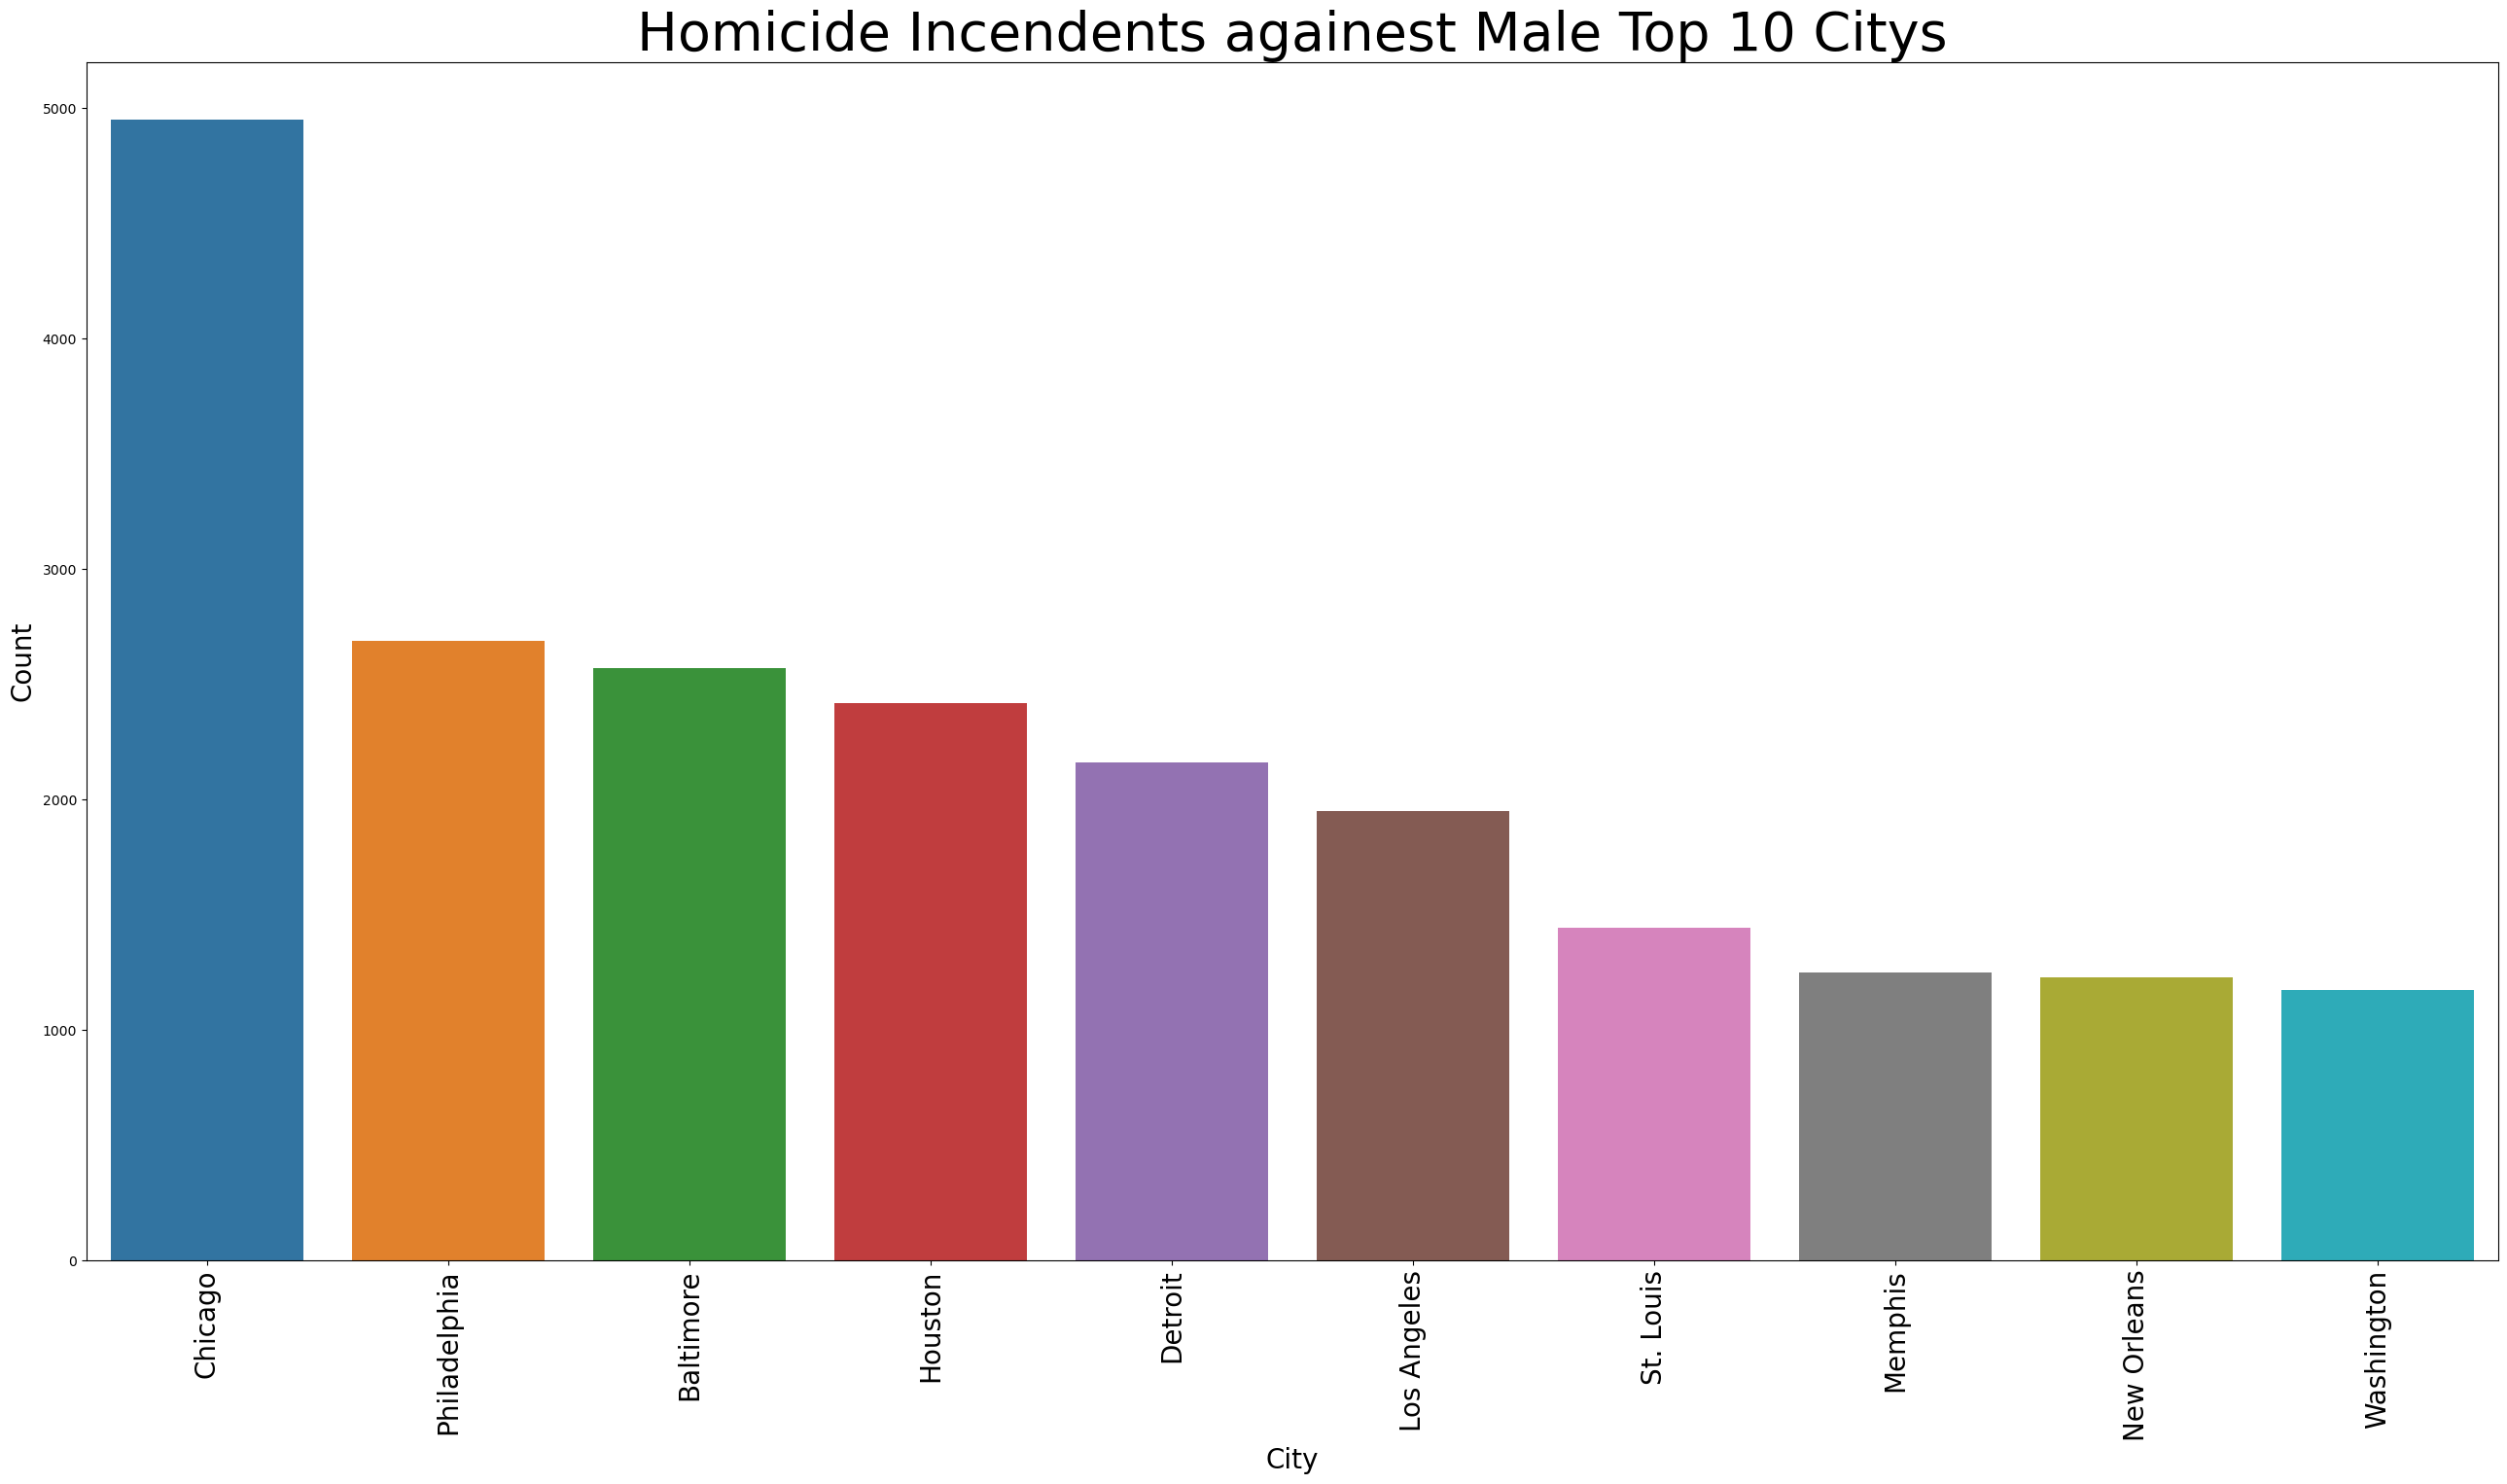

In [186]:
plt.figure(figsize=(32,16))
sns.barplot(x='city',y='Count',data=df_top_10_Male_City)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Homicide Incendents againest Male Top 10 Citys",fontsize=40)

## Observation
- **Highest** : Female People of **Chicago** state have suffering with high homicide incidents Highest
- **Second Highest** : Female People of **Philadelphia** state have suffering with Second Highest homicide incidents  

# victim_sex V/s victim_disposition
## Female

In [187]:
df_sex_disposition= df.groupby('disposition')['victim_sex'].value_counts().reset_index(name="Count")

In [188]:
df_sex_disposition

,disposition,victim_sex,Count
0,Closed by arrest,Male,19092
1,Closed by arrest,Female,4415
2,Closed by arrest,Unknown,2167
3,Closed without arrest,Male,1768
4,Closed without arrest,Female,832
5,Closed without arrest,Unknown,322
6,Open/No arrest,Male,19879
7,Open/No arrest,Female,1962
8,Open/No arrest,Unknown,1742


In [189]:
df_sex_Female_disposition = df_sex_disposition.loc[df_sex_disposition['victim_sex']=='Female']

Text(0.5, 1.0, 'Distribution of Disposition of Female people')

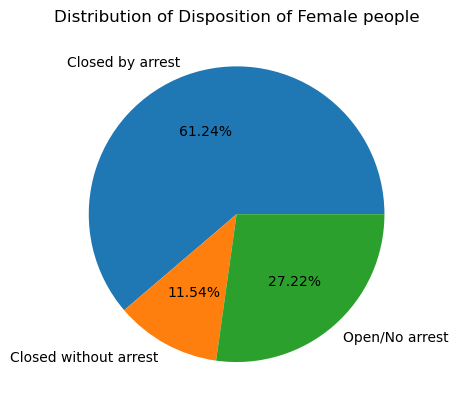

In [190]:
plt.pie(x='Count',labels='disposition',data=df_sex_Female_disposition,autopct='%1.2f%%')
plt.title("Distribution of Disposition of Female people")

## Observation
- **Highest** : **Closed By Arrest**
- The Police Has succefully Chasing The Cases in case of Female Population

## Male

In [191]:
df_sex_Male_disposition=df_sex_disposition.loc[df_sex_disposition['victim_sex']=="Male"]

In [192]:
df_sex_Male_disposition

,disposition,victim_sex,Count
0,Closed by arrest,Male,19092
3,Closed without arrest,Male,1768
6,Open/No arrest,Male,19879


Text(0.5, 1.0, 'Distribution of Disposition of Male people')

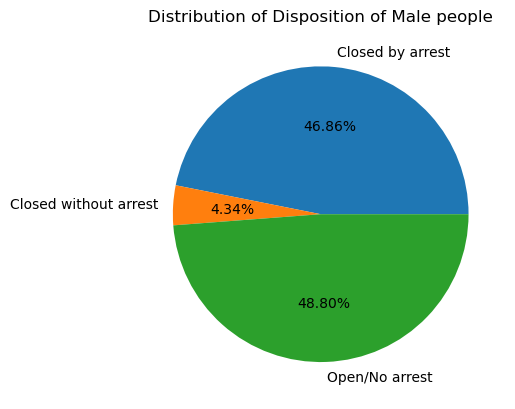

In [193]:
plt.pie(x='Count',labels='disposition',data=df_sex_Male_disposition,autopct='%1.2f%%')
plt.title("Distribution of Disposition of Male people")

## Observation
- **Highest** : **Open/No Arrest** and Closed by arrest , Open/No Arrest are more or less equal
- The Male Homicide case are quit challeging to the police

# Thank You